In [1]:
import numpy
import pandas as pd
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [2]:
stats = pd.read_csv('MLB Stats.csv')
pitchers = pd.read_csv('2016Pitchers.csv')

stats = stats[stats['Season'] == 2016]
stats = stats.drop_duplicates(subset=['playerID'])

In [3]:
filtered_stats = stats.filter(items=['playerID', 'Player Name', 'weight', 'height','AB','R','H','2B','3B','HR','RBI','SB','BB','salary','PA'])
BA = filtered_stats['H']/filtered_stats['AB']
OBP = (filtered_stats['H']+filtered_stats['BB'] + stats["HBP"])/(filtered_stats['AB']+filtered_stats['BB']+stats['HBP']+stats['SF'])
singles = filtered_stats['H'] - ((filtered_stats['2B'])+(filtered_stats['3B'])+(filtered_stats['HR']))
SLG = ((singles)+(2*filtered_stats['2B'])+(3*filtered_stats['3B'])+(4*filtered_stats['HR']))/filtered_stats['AB']
OPS = OBP+SLG
filtered_stats.insert(15,'BA', BA)
filtered_stats.insert(16,'OBP', OBP)
filtered_stats.insert(17,'SLG', SLG)
filtered_stats.insert(18,'OPS', OPS)

In [4]:
pitchers['Name'] = pitchers['Name'].astype('string')

In [5]:
pitchers["Name"] = pitchers["Name"].map(lambda x: x.rsplit('*',1)[0])

In [6]:
filtered_stats['Player Name'] = filtered_stats['Player Name'].astype('string')

In [7]:
pitchernames = (pitchers["Name"])
index_names=[]
for name in pitchernames:
    index_names.append(name)


for i in range(550):
    testname = ( (filtered_stats.iloc[i])['Player Name'])
    if testname in index_names:
        name = filtered_stats.iloc[i]['Player Name']
        filtered_stats = filtered_stats[filtered_stats['Player Name'] != name]


In [8]:
filtered_stats = filtered_stats[filtered_stats['AB']>=50]
filtered_stats = filtered_stats[filtered_stats['salary']>=750000]

In [9]:
filtered_stats.head()

,playerID,Player Name,weight,height,AB,R,H,2B,3B,HR,RBI,SB,BB,salary,PA,BA,OBP,SLG,OPS
81,abreujo02,Jose Abreu,255,75,624,67,183,32,1,25,100,0,47,11666667,702,0.293269,0.352518,0.467949,0.820467
117,ackledu01,Dustin Ackley,205,73,61,6,9,0,0,0,4,0,8,3200000,70,0.147541,0.242857,0.147541,0.390398
132,adamsma01,Matt Adams,245,75,297,37,74,18,0,16,54,0,25,1650000,328,0.249158,0.308869,0.471380,0.780249
412,alonsyo01,Yonder Alonso,230,73,482,52,122,34,0,7,56,3,45,2650000,533,0.253112,0.315789,0.367220,0.683009
436,altuvjo01,Jose Altuve,165,66,640,108,216,42,5,24,96,30,60,3687500,728,0.337500,0.396359,0.531250,0.927609


**Introduction**

We set out to discover what baseball hitter statistics and attributes might have impact on resulting player salary, specifically for the 2016 MLB season, as this was the most recent season with complete, consistent data in a consolidated format.

This research topic is interesting to explore because it is often unclear what leads a player to financial success. Although the obvious answer seems to be that the better the player, the higher the salary, our goal is to dissect attributes and understand which of them most reliably results in an increase a player’s salary. With our research and analysis, our goal is to understand the criteria that leads to an increase in salary and on what aspects the players should focus on if their goal is to make more money. Thus, we elected to look at which specific, workable skills and attributes to identify which ones are expected to make a player more profitable in the MLB rather than analyze advanced analytic data that is often calculated based upon these standard statistics.

In the data that we used there is a possibility that players that are missing from the data. This would mean that our data could mean some players have performed well and made more money, but are not on the list, but could also mean the opposite. Because the amount of players that aren’t represented is low, this should not have real effects on answering our research question. It is also important to take into account that some of the players might not have played for a whole season due to injury or splitting time between the Major and Minor leagues, and that the data might not take that into account. This could affect the attributes influence on salary if players’s statistics decrease when they are not actually playing, but this should be negligible. These, however, are minor issues and the data (particularly after filtering) still should be comprised of reliable, workable statistics capable of yielding accurate results.

After our analysis of the data, we came to discover that four batting statistics stood out as relatively accurate predictors of MLB player salary. These statistics were hits, home runs, walks, and runs batted in (RBIs). While the correlations of these statistics were not particularly strong for linear regressions, our evaluations of significance yielded results that allowed us to be quite confident in our results. This is because each of these statistics proved they would be extreme outliers from random pairs of salary and each respective statistic in terms of both correlation coefficient and slope, with not a single correlation being greater than the ones we found. As a result, we know that the correlations we discovered were more than a result of random chance.

With our joint model indicating that a positive correlation does exist between hits and home runs as well as hits and RBIs, we would recommend that hitters focus on two things to increase their salary: their hitting power and their "batting eye," or ability to distinguish balls from strikes and swing at pitches accordingly. By doing this, we confidently believe MLB hitters stand a reasonable chance to earn a higher paying contract.

**Data Description**
- **What are the observations (rows) and the attributes (columns)?** The observations, or rows, are MLB players. Specifically, we are looking at MLB hitters in the 2016 season. The attributes, or columns, consist of several statistics and features of those players, including their salaries and attributes that may have an effect on their salaries (which we are setting out to discover). These include baseball statistics such as RBI as well as personal features such as height and weight. Here is a full list of the attributes we are looking at:
    - playerID
    - Player Name
    - Weight (in lbs)
    - Height (in inches)
    - AB (at bats)
    - R (runs)
    - H (hits)
    - 2B (doubles)
    - 3B (triples)
    - HR (home runs)
    - RBI (runs batted in)
    - SB (stolen bases)
    - BB (base on balls, a.k.a. walks)
    - Salary (for the 2016 season, in tens of millions of dollars)
    - PA (plate appearance)
    - BA (batting average)
    - OBP (on base percentage)
    - SLG (slugging percentage)
    - OPS (on-base plus slugging)


- **Why was this dataset created?** The original dataset was created to keep track of player information over the years, for all teams and all positions. This includes not just statistics, but other player features typically looked at in the sports world as well, such as physical attributes. Player data and statistics, in baseball as well as other sports, is typically kept track of to compare players over the years, as well as to each other, to understand the game and how it is evolving. This data is used for analytics throughout the season. We filtered our dataset to contain only hitters in the 2016 season, because this season is one of the most recent with available, plentiful data, and attributes of pitchers that quantify them as “good” and may be linked to a higher salary are very different than that of hitters. We also added some statistics by calculation with other columns. This filtered dataset was created for a more comprehensible analysis of player attributes and salary.


- **Who funded the creation of the dataset?** The datasets used in the creation of our final dataset for analysis were funded by the MLB, which tracks and publishes player data and distributes it to a variety of sources, including posting it on their website. Player and team statistics are public knowledge that are tracked and published throughout each season. Although some of this data was retrieved from sources with no relation to the MLB, the creation of this data was funded by the MLB itself.

- **What processes might have influenced what data was observed and recorded and what was not?** There are many processes that could have influenced what data was seen or was not. For example, due to injuries happening during the season many players have to stop playing for a period of time to allow themselves to recover - this in turn goes as unseen data as their performance cannot be evaluated as a full season to compare with other players. Similarly, there are drug tests that take place during the season such as steroid testing and players who do not pass those tests are suspended from the season which prevents their data from being seen. Short absences like these will impact a player’s cumulative statistics for a season. Other problems include illnesses and family emergencies among other personal issues that can affect attendances to some games. Additionally, cases of ejections can also affect a player’s statistics, as some games may appear with partial or no statistics. However, significant absences from injury, suspension, family matters, ilnesses or ejection do not comprise the majority of the data, meaning that most of what is observed is actually from players who manage to play for a significant majority of the season. 

- **What preprocessing was done, and how did the data come to be in the form that you are using?** Baseball-reference.com and similar websites hold a lot of data on player, team and manager statistics. To obtain this data, they have references where they contact the official MLB website for their database and can then process it to obtain the finalized data they need. Most of the data actually is also available for public use as MLB games are watched and recorded by fans, reporters and statisticians alike, hence statistics on these sites will agree with the data the MLB website puts forward. Of course, to preprocess the data from the websites we obtained our info from, we picked out only the relevant records. Since we have 2 csv files we will be using, we will also process those 2 files into 1 single dataframe for easy usage using the pandas library. We did this by limiting the dataset to observations where the Season column is 2016, and then filtering out unwanted columns. We also iterated through the list of player names and checked if they were in the pitchers dataset. If they were, we removed those as well, leaving us with only MLB hitters in the 2016 season. We also removed observations with AB (at bats) less than 50; these are players who batted or players limited times due to injury, playing most of season in the minor league, or other extenuating circumstances. This will remove data that may skew our results. We chose the number 50 based on web searches that pointed to this being a reasonable number. Lastly, we filtered out players with salaries below $750,000 per year, a number that serves two purposes. First, it effectively removes players on entry level contracts who have yet to have their Major League play evaluated and, thus, be paid accordingly. For example, a rookie on this type of contract who posts outstanding statistics is on the same type of contract as a rookie who played 1 game, thus heavily swaying the data. Second, this number removes other rookies who were only playing at the Major League level for an incomplete portion of the year. Evaluating a player with just a few games played is impossible and could also sway the overall data.

- **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?** All players involved in data collection are well aware that their playing statistics and salaries are not only being collected, but are also generally public knowledge. In fact, one can assume that they expected this data to be used for purposes like these, analyses of their playing ability and monetary value as employees of a business. The fact that the usage was open ended is interepreted from the accessible nature of this dataset.

- **Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).** Our raw data was obtained from two sources, baseball-reference.com (a privately sourced data compiling site that gets data directly from MLB) and data.world (an open source data posting platform; data was posted by a user who got statistics from MLB). The datasets can be found at https://drive.google.com/drive/folders/17tmbkDN8lQ_Zw-Yflys3fJcIquH2EWyt?usp=sharing

**Data Analysis**

To start our analysis, before further evaluating, we wanted to take a look at the distribution of salaries in MLB to get a sense of any potential skew in our data. It appears that the salary is skewed right, with a much higher concentration of players having lower salaries under $10 million.

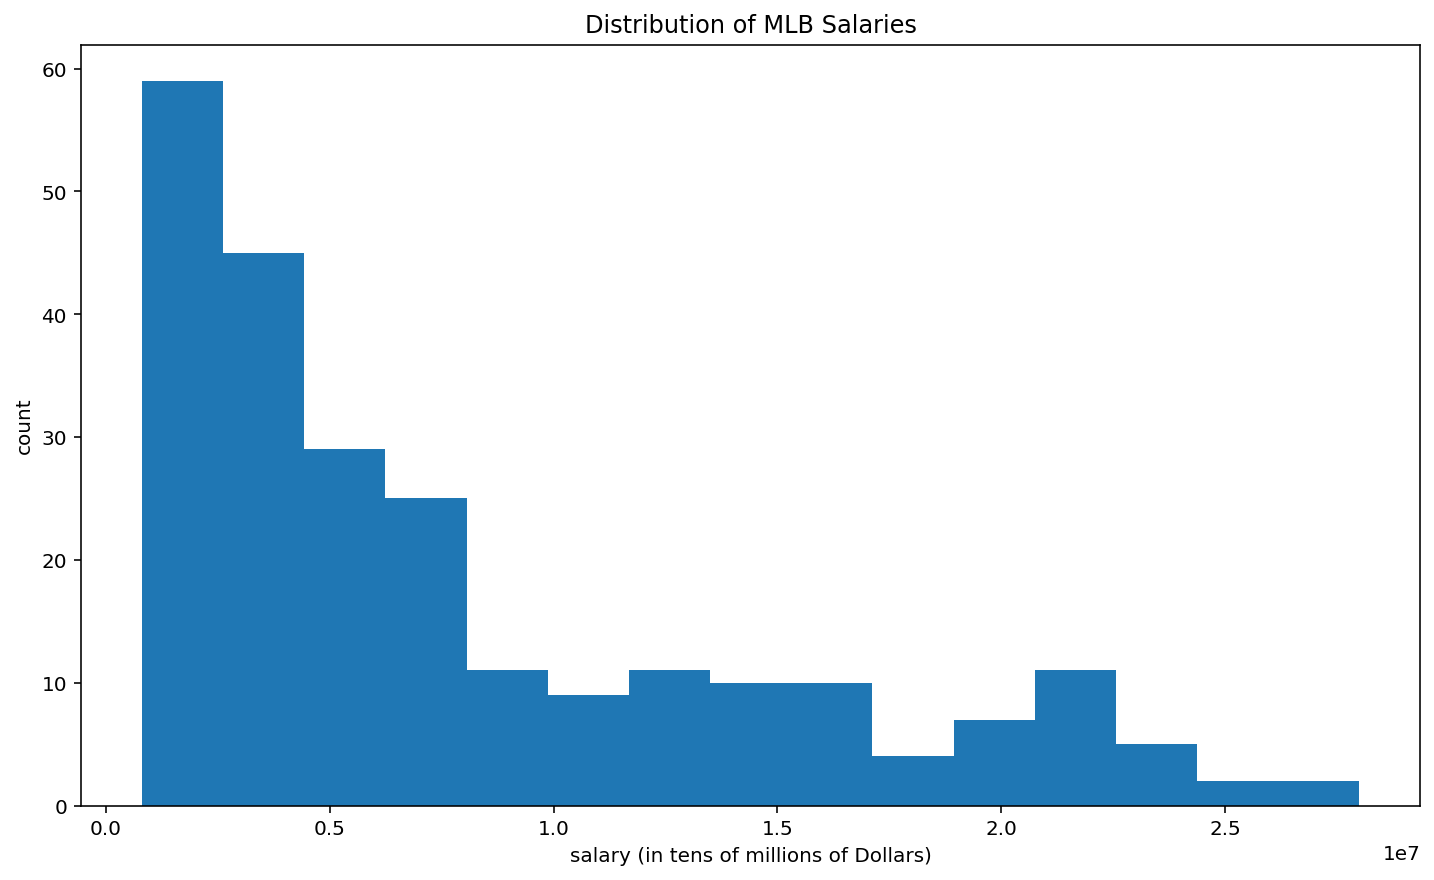

In [10]:
pyplot.hist(filtered_stats['salary'], bins=15)
pyplot.title('Distribution of MLB Salaries')
pyplot.xlabel('salary (in tens of millions of Dollars)')
pyplot.ylabel('count')
pyplot.show()

Next, we graphed each variable with salary and evaluate the strength of the linear correlation between the two using Pearson, Spearman, and Kendall correlations. Summary stats are printed next to the scatterplots using a describe() function. Using this data, we can identify a few of the relationships that seemed strongest to further analyze.

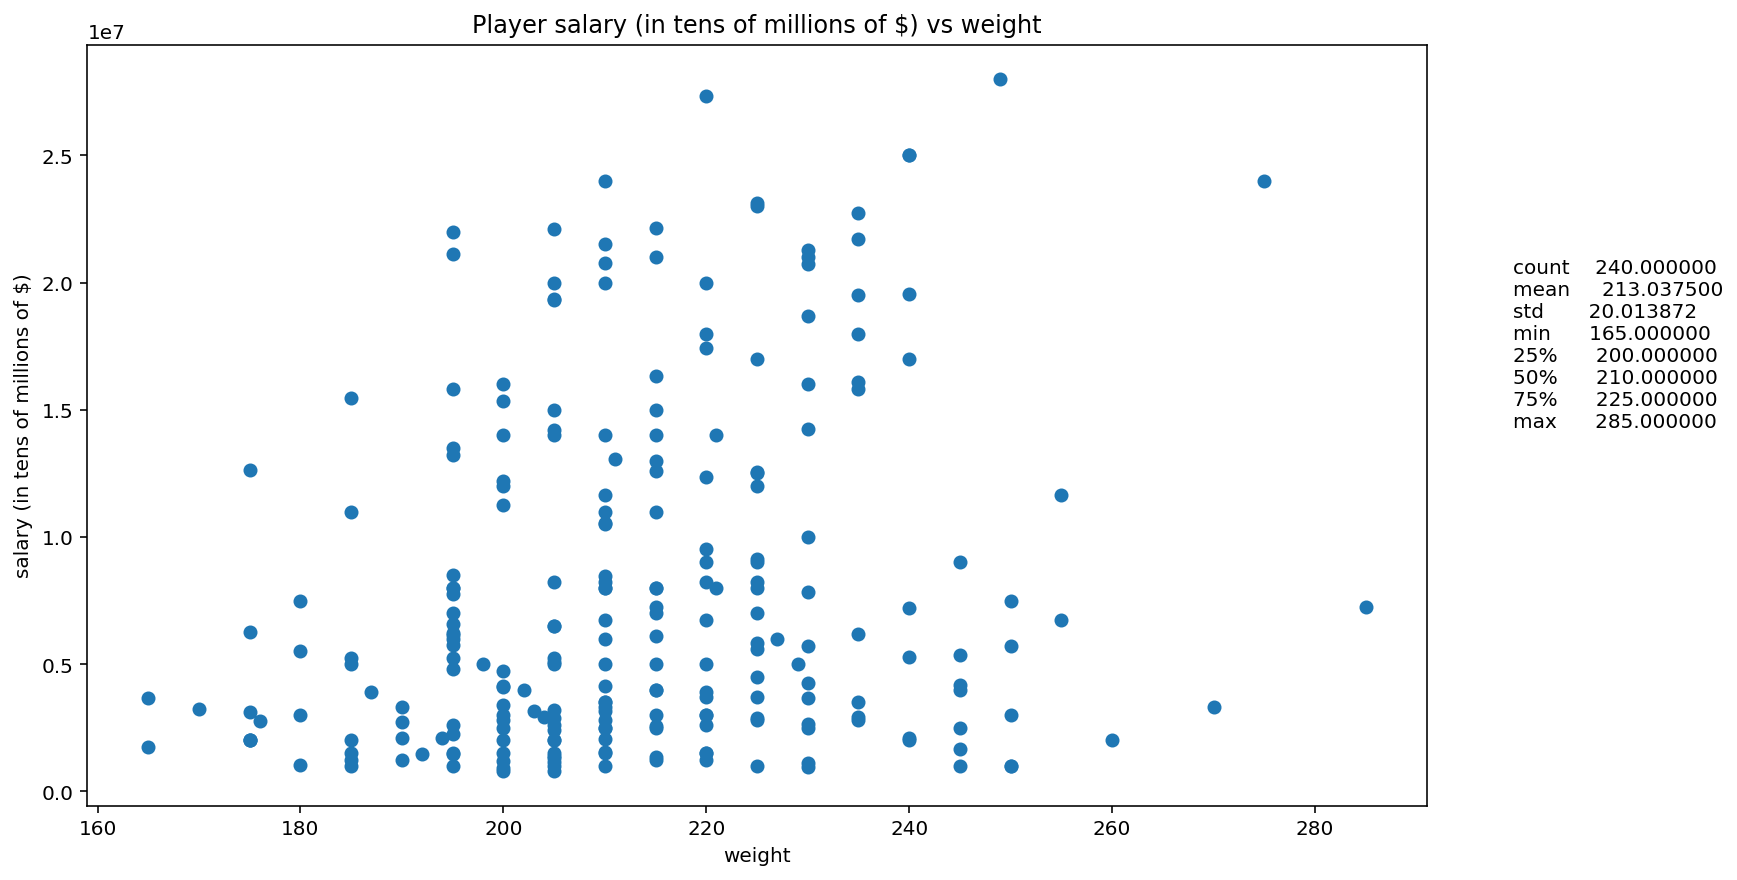

Pearson correlation coefficient of weight and salary: 0.21470933754574414
Spearman correlation coefficient of weight and salary: 0.21819876476937777
Kendall correlation coefficient of weight and salary: 0.15279029364963823


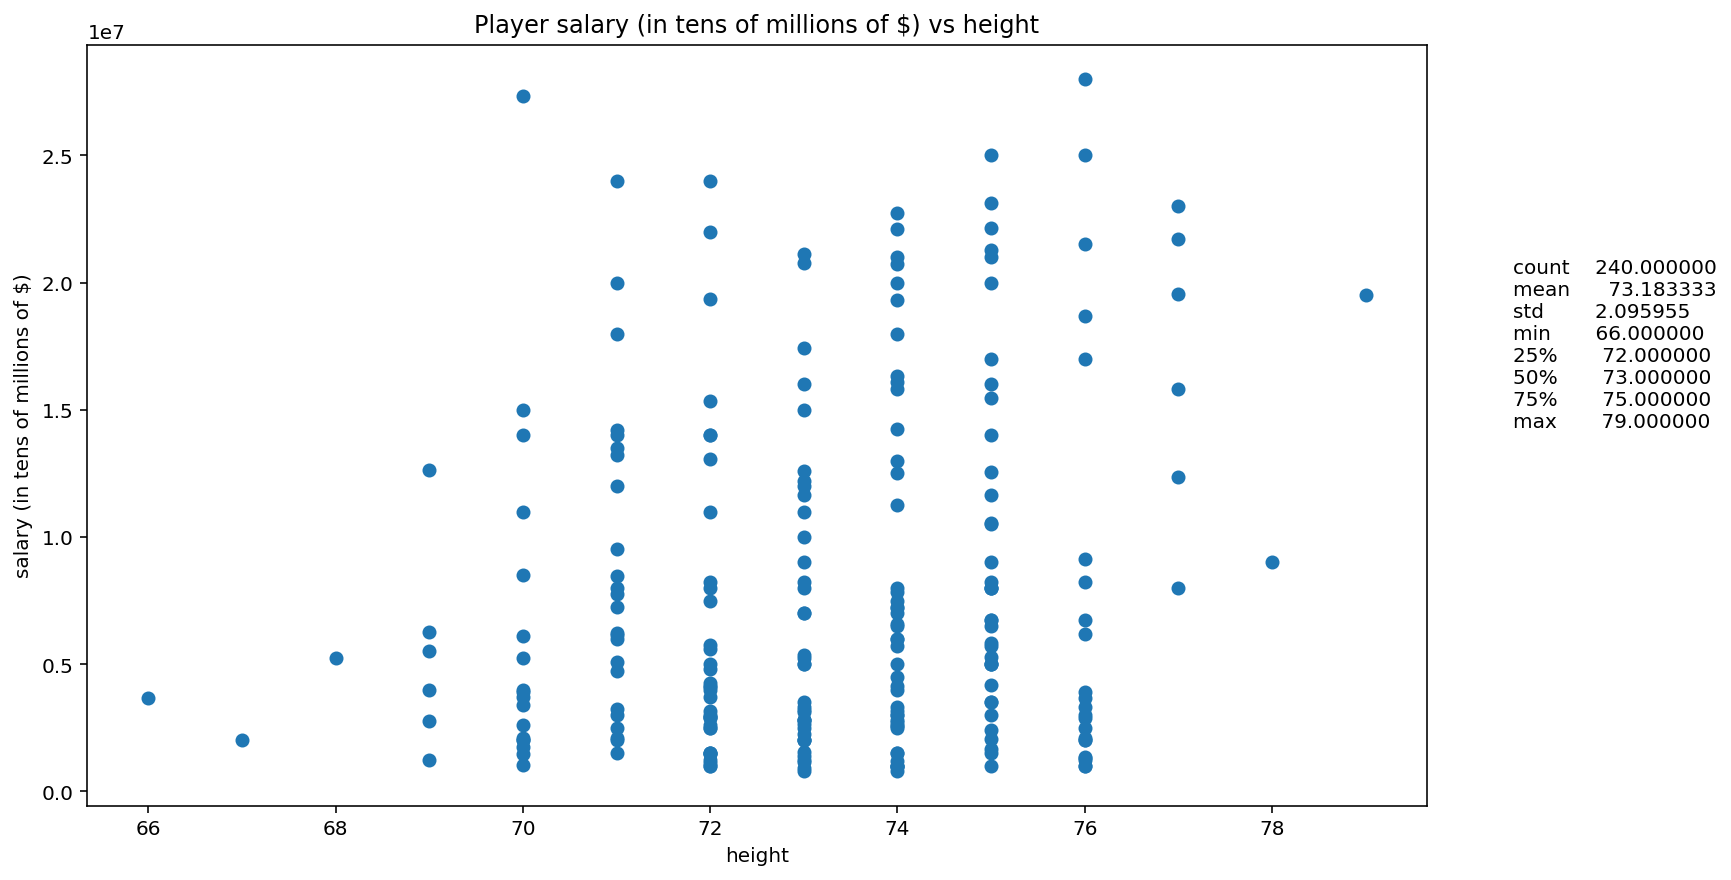

Pearson correlation coefficient of height and salary: 0.18417778978891414
Spearman correlation coefficient of height and salary: 0.13643952162339595
Kendall correlation coefficient of height and salary: 0.09719859280760197


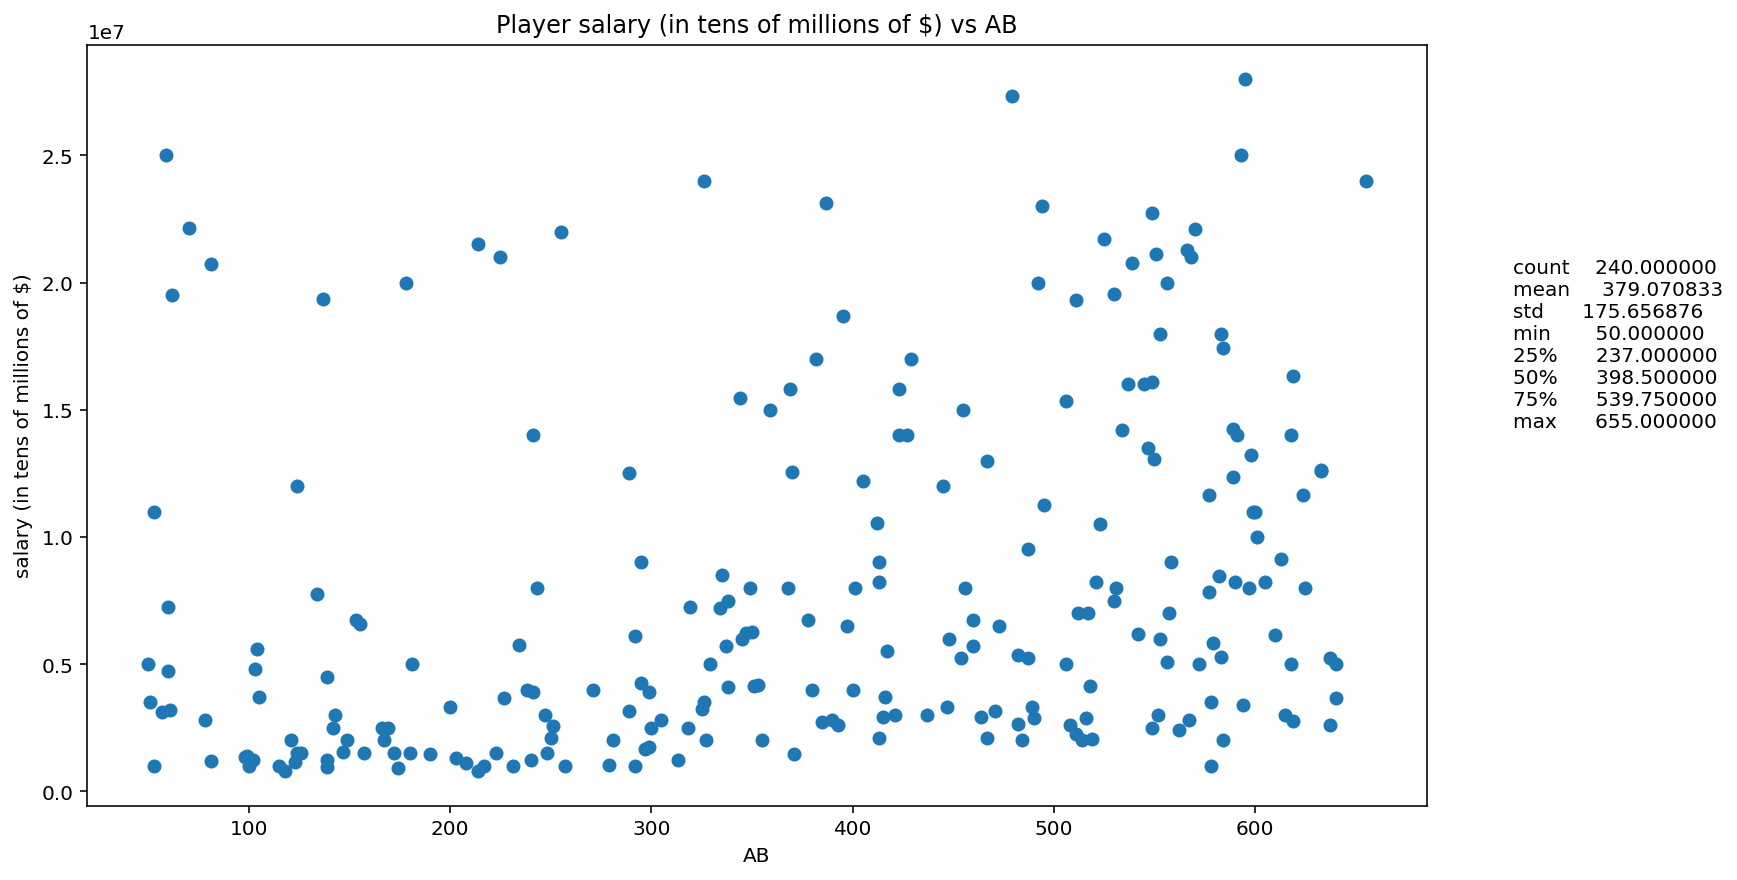

Pearson correlation coefficient of AB and salary: 0.2985232817638316
Spearman correlation coefficient of AB and salary: 0.3972297323377687
Kendall correlation coefficient of AB and salary: 0.27719830951151214


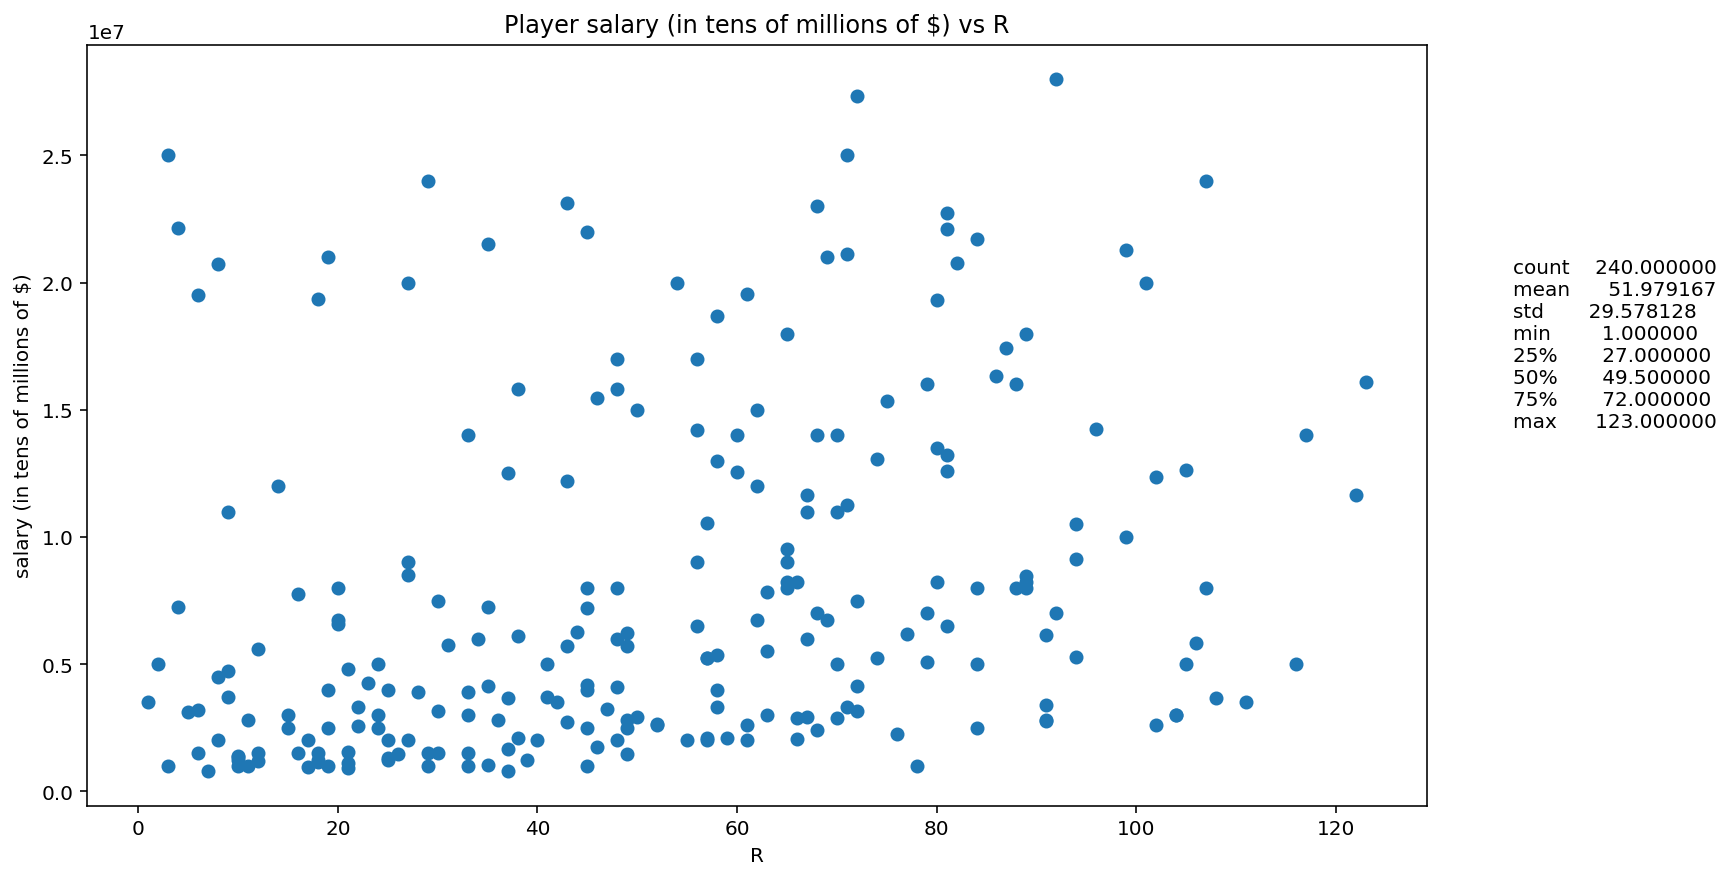

Pearson correlation coefficient of R and salary: 0.296222080505239
Spearman correlation coefficient of R and salary: 0.3947394754694804
Kendall correlation coefficient of R and salary: 0.2750919847266515


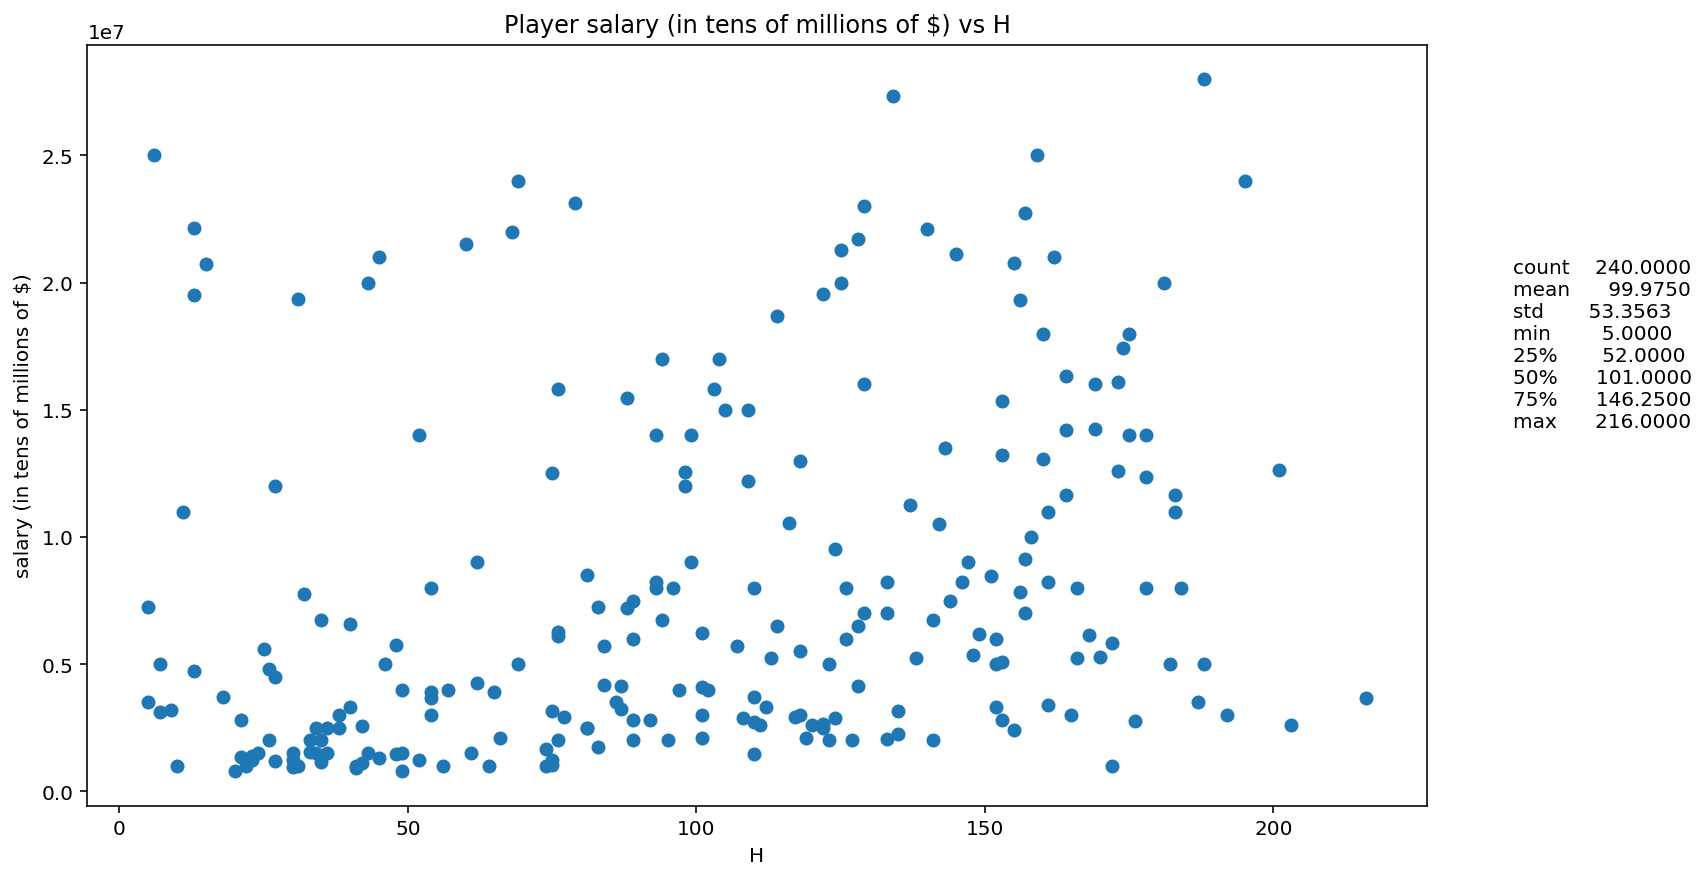

Pearson correlation coefficient of H and salary: 0.2942717851361791
Spearman correlation coefficient of H and salary: 0.39373547223949845
Kendall correlation coefficient of H and salary: 0.2765460521274193


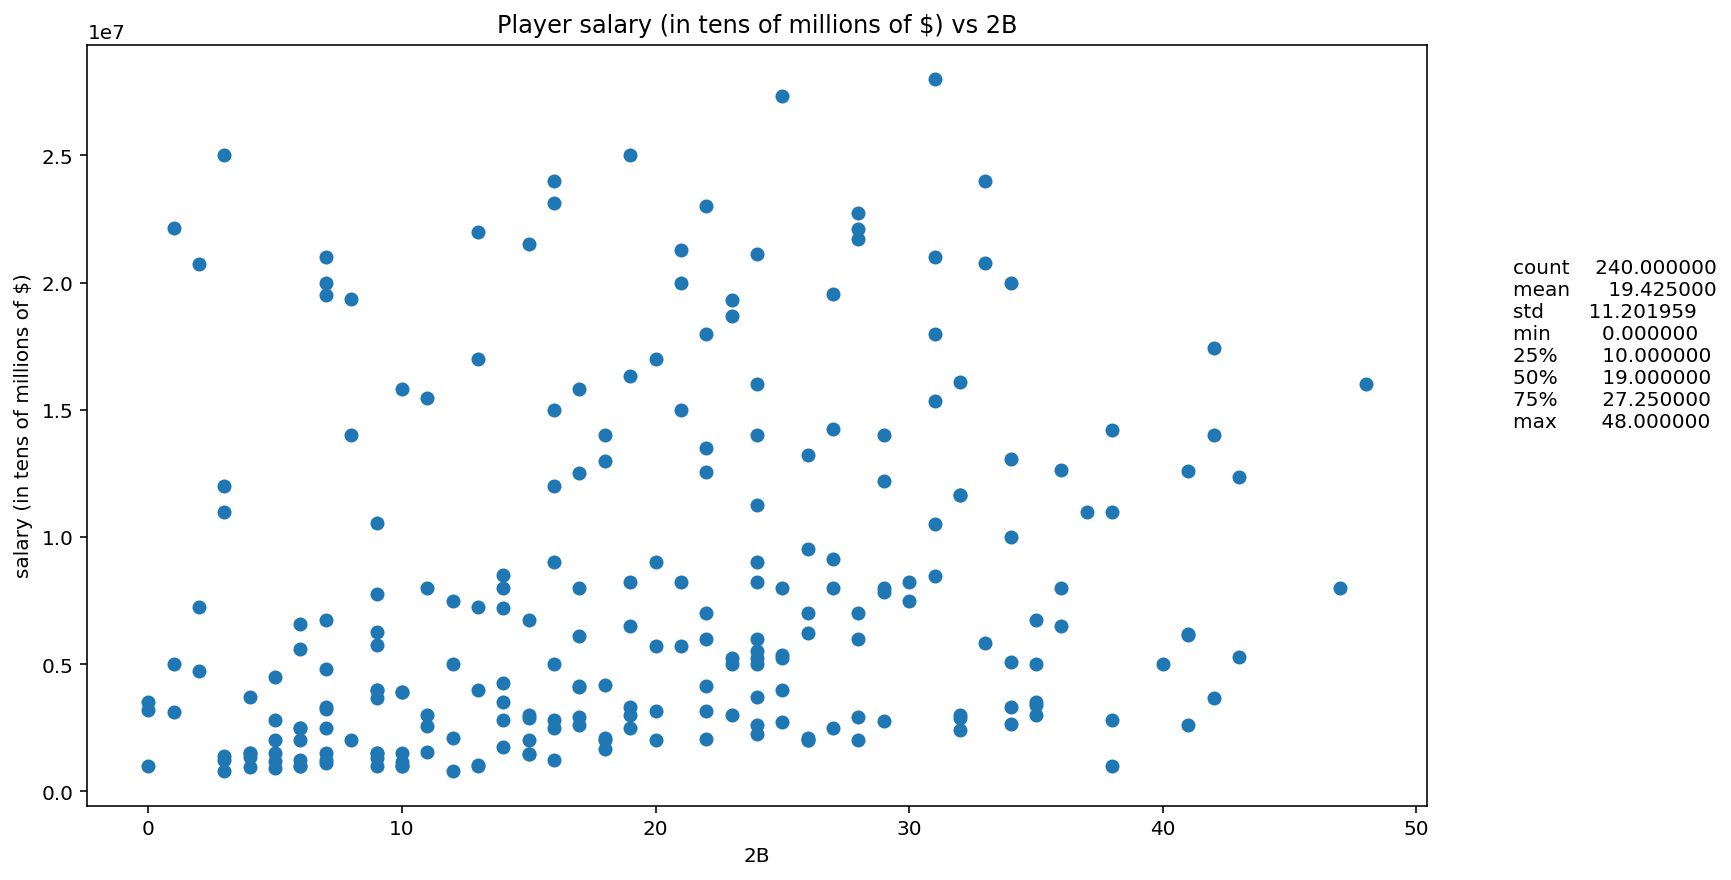

Pearson correlation coefficient of 2B and salary: 0.2281253435514241
Spearman correlation coefficient of 2B and salary: 0.33828911514073
Kendall correlation coefficient of 2B and salary: 0.23578742932363975


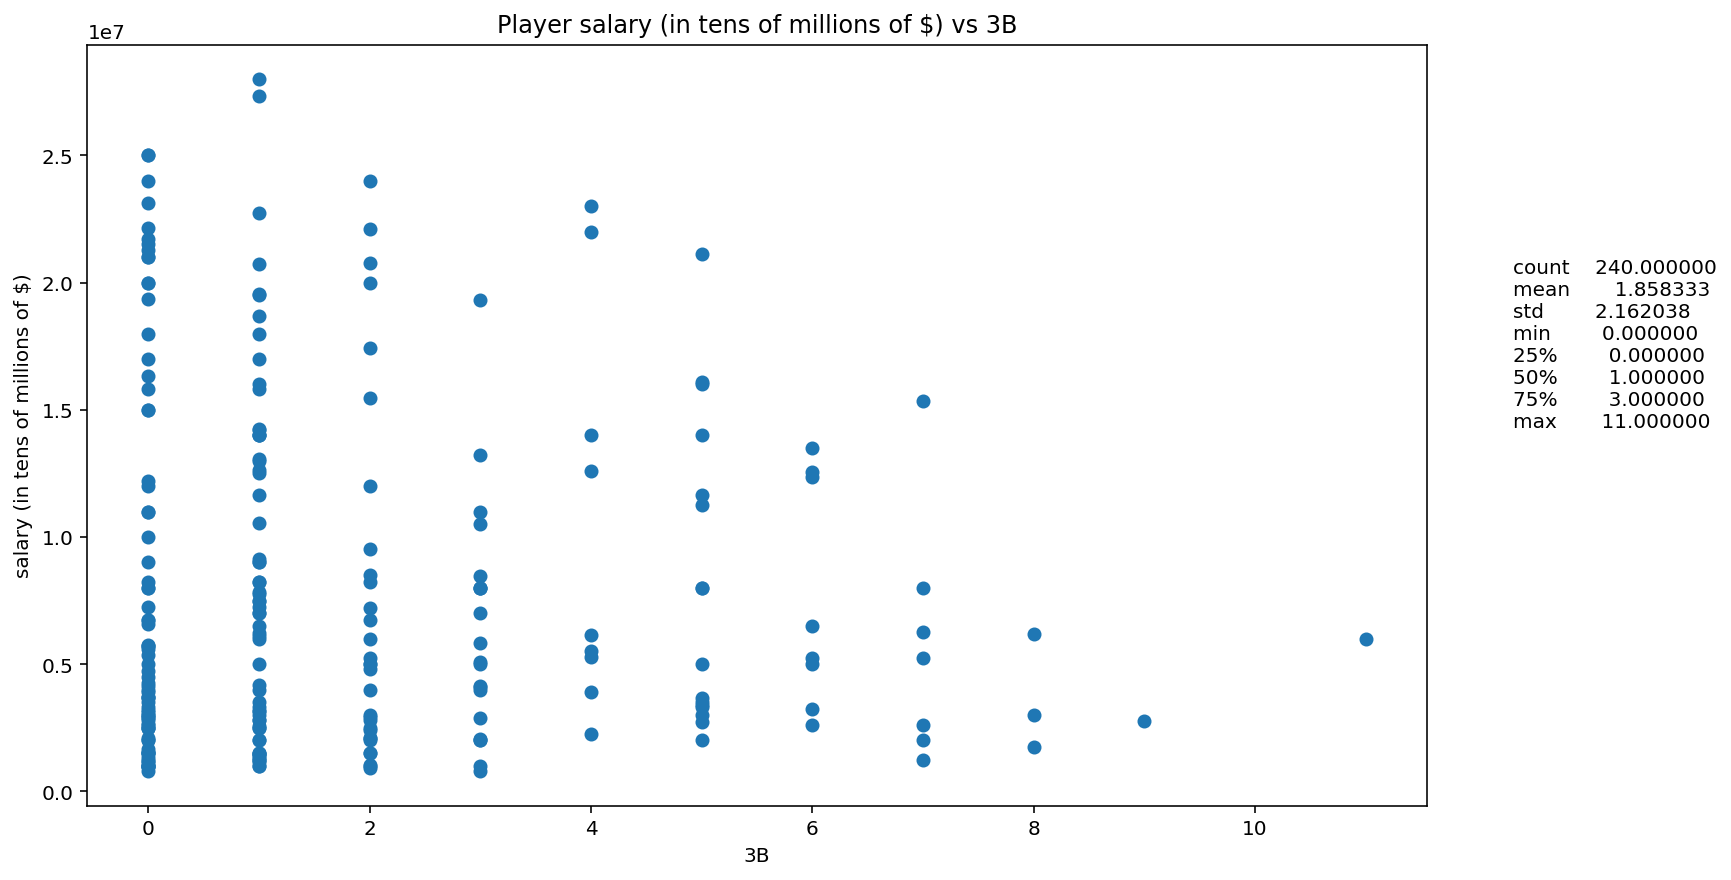

Pearson correlation coefficient of 3B and salary: -0.0694100734390679
Spearman correlation coefficient of 3B and salary: 0.014180462748458224
Kendall correlation coefficient of 3B and salary: 0.007475995112260108


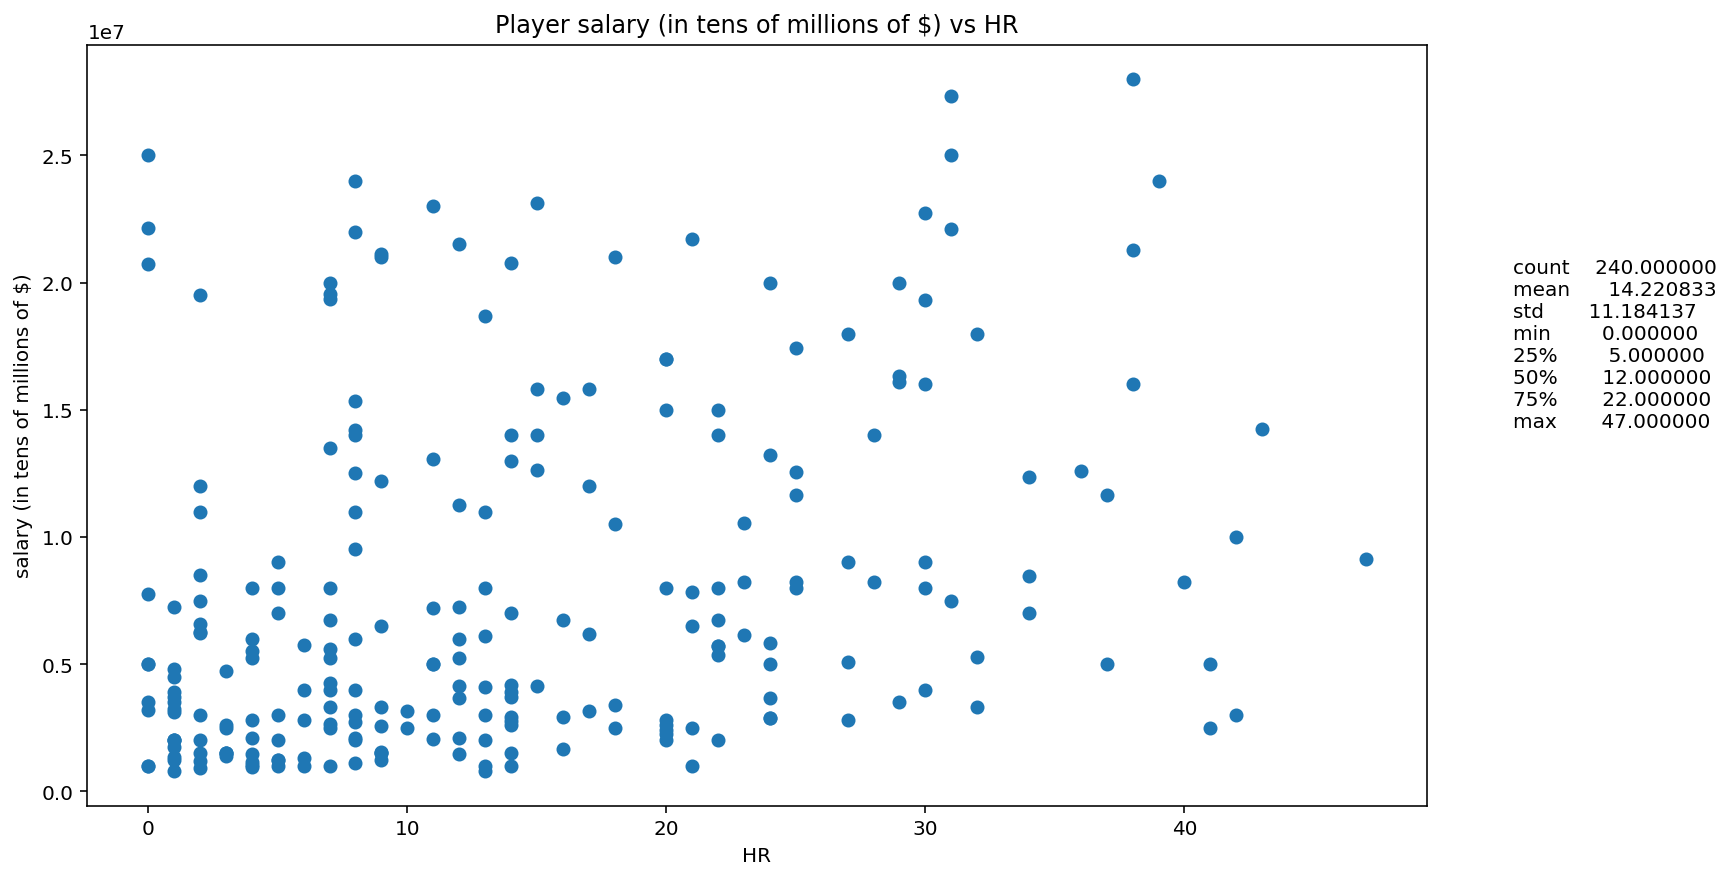

Pearson correlation coefficient of HR and salary: 0.32755512201437054
Spearman correlation coefficient of HR and salary: 0.37512305379838934
Kendall correlation coefficient of HR and salary: 0.2600739623874983


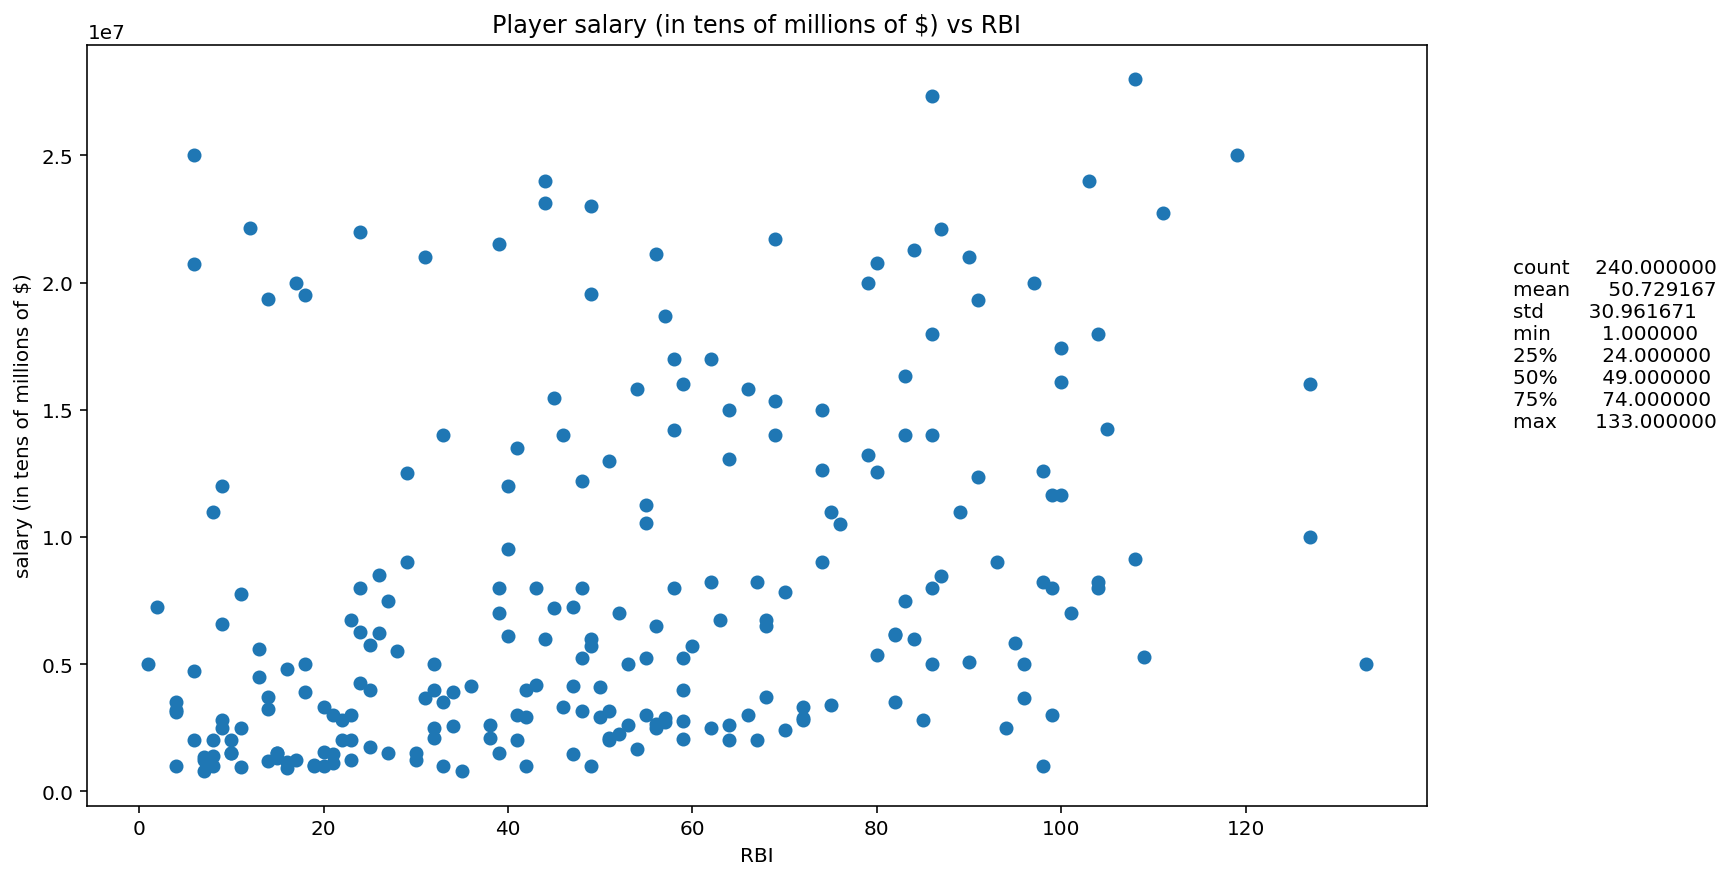

Pearson correlation coefficient of RBI and salary: 0.3673257968374213
Spearman correlation coefficient of RBI and salary: 0.4343730379882009
Kendall correlation coefficient of RBI and salary: 0.30363952808641237


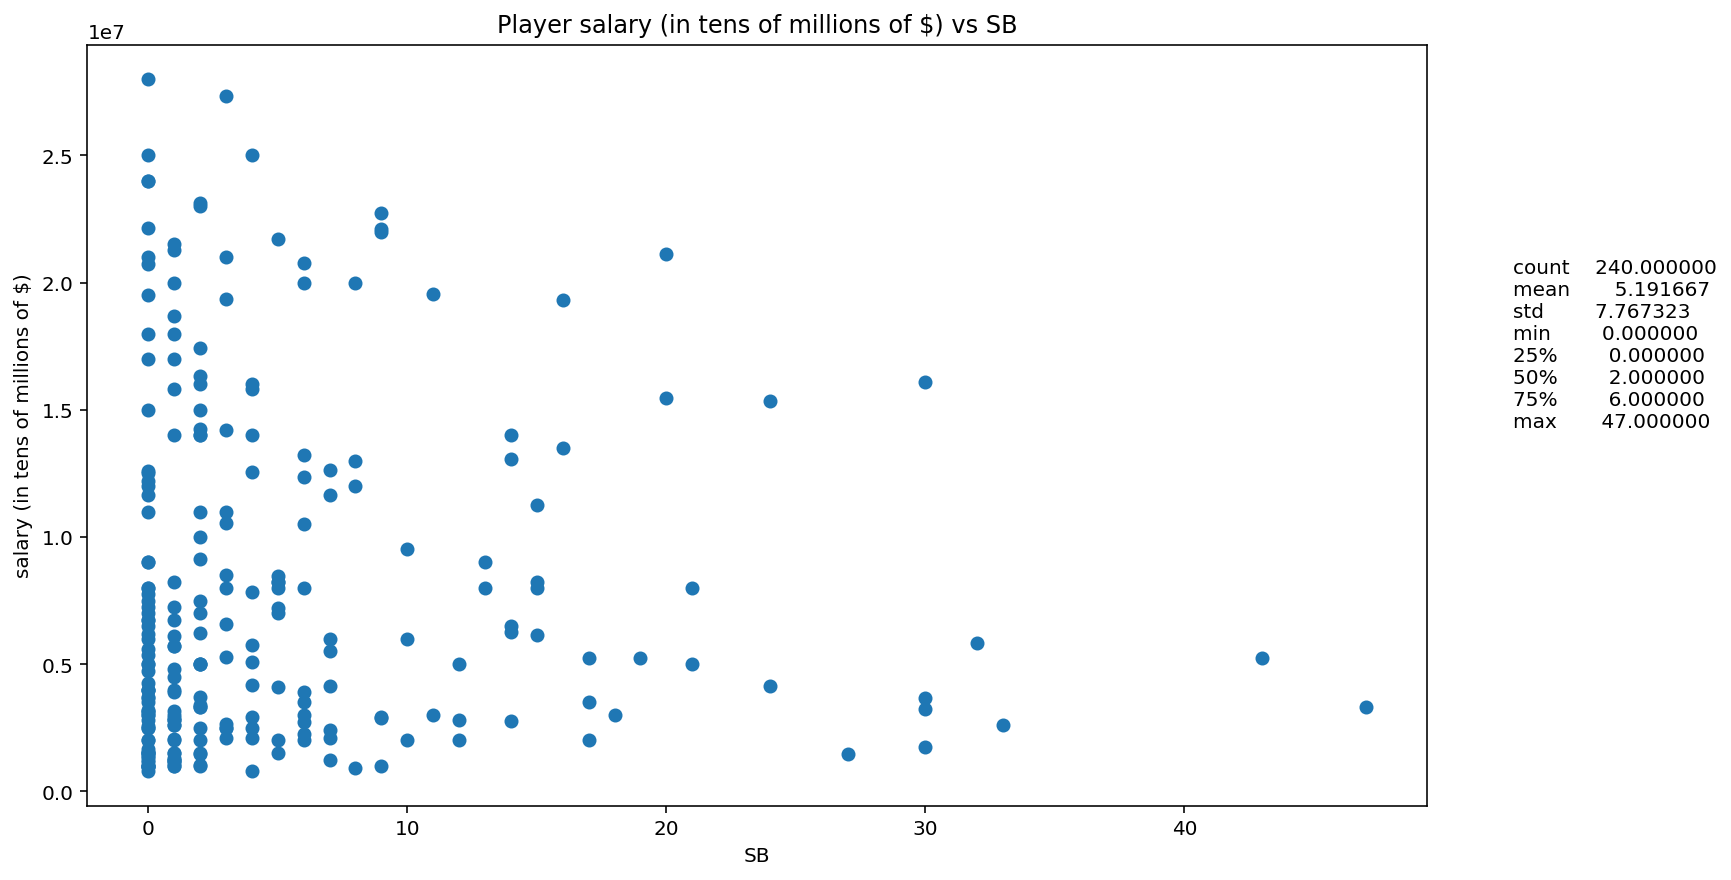

Pearson correlation coefficient of SB and salary: -0.018654414631359834
Spearman correlation coefficient of SB and salary: 0.10265131270934304
Kendall correlation coefficient of SB and salary: 0.07026135732279039


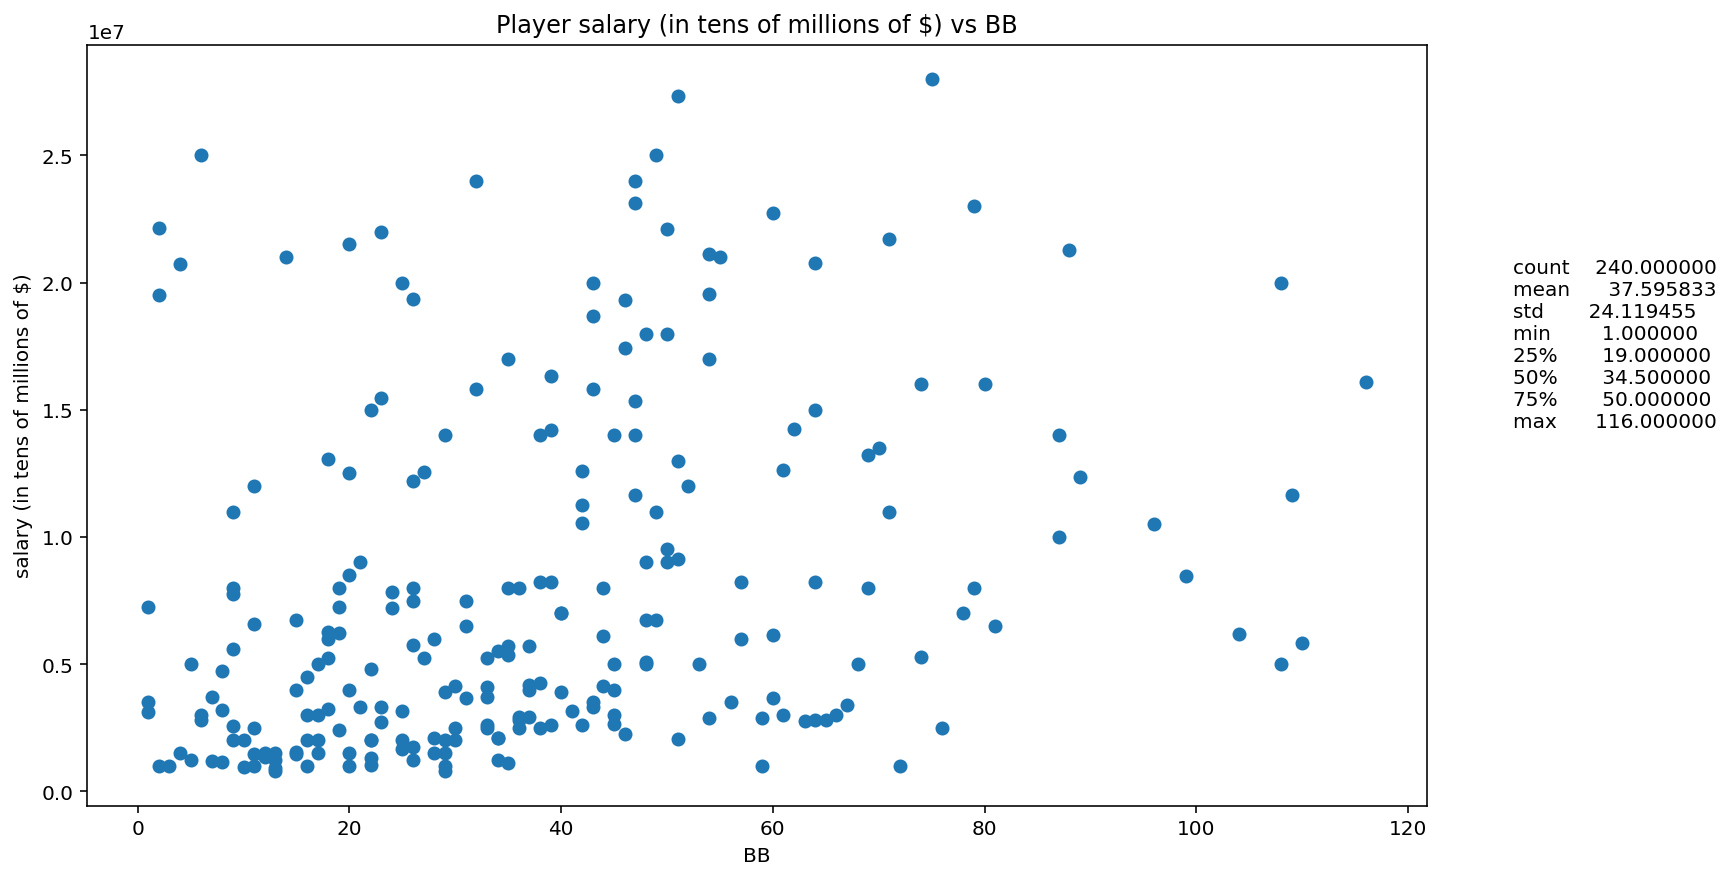

Pearson correlation coefficient of BB and salary: 0.30538184591396983
Spearman correlation coefficient of BB and salary: 0.39006615879310563
Kendall correlation coefficient of BB and salary: 0.27711028940230503


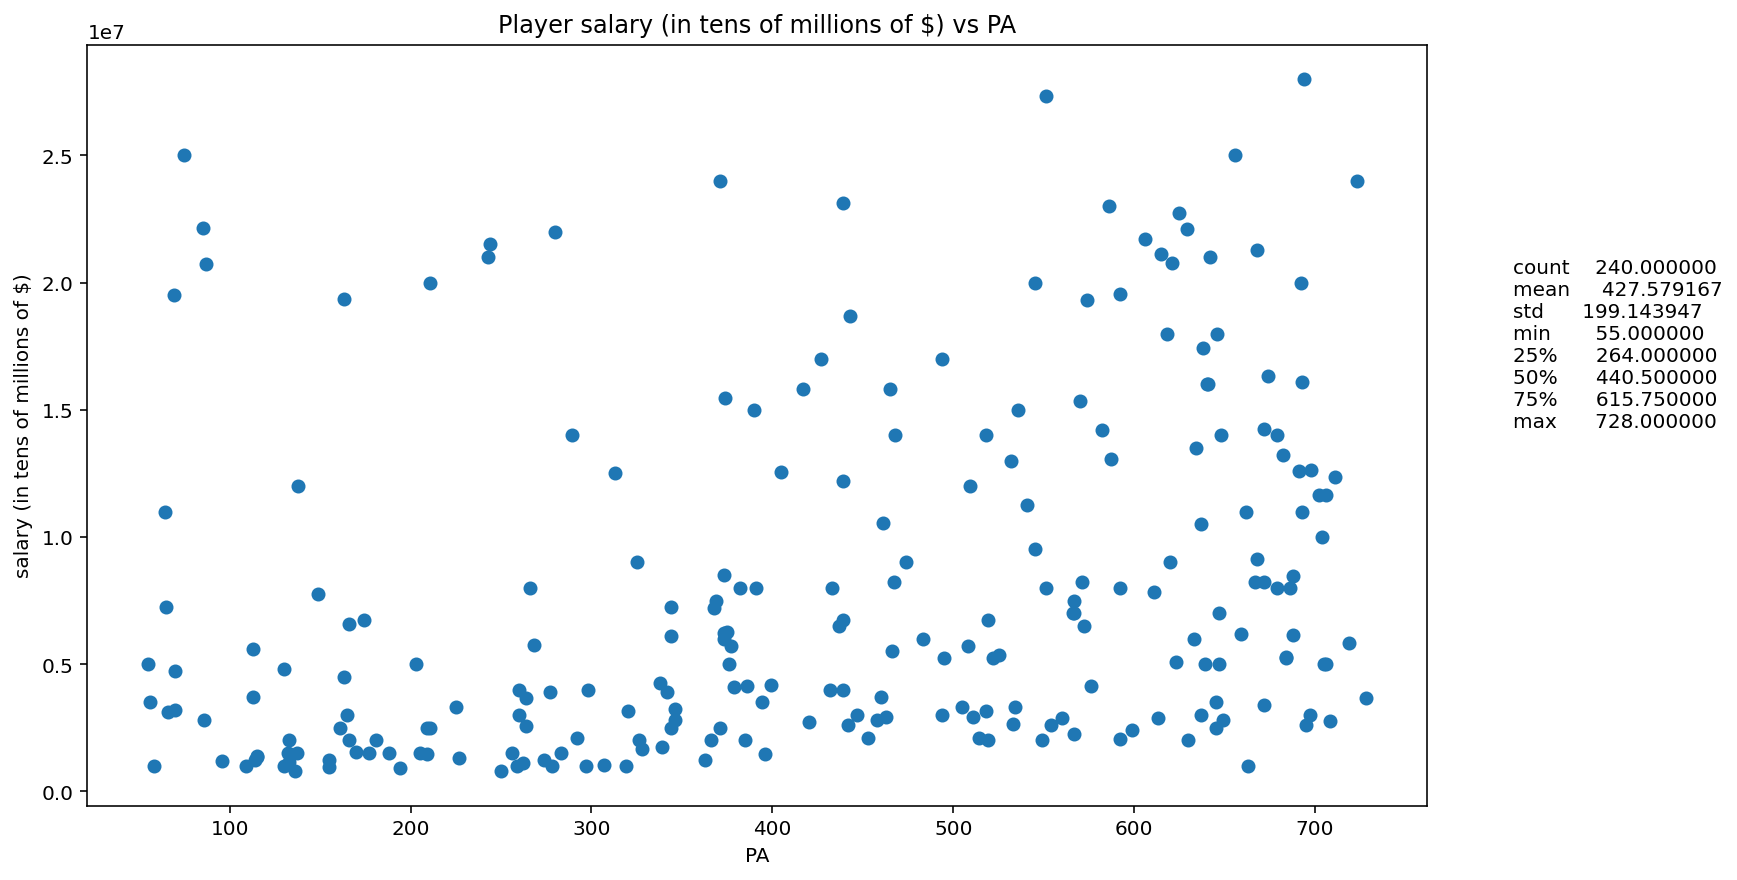

Pearson correlation coefficient of PA and salary: 0.3068198969793094
Spearman correlation coefficient of PA and salary: 0.4031873110213127
Kendall correlation coefficient of PA and salary: 0.28186173854608887


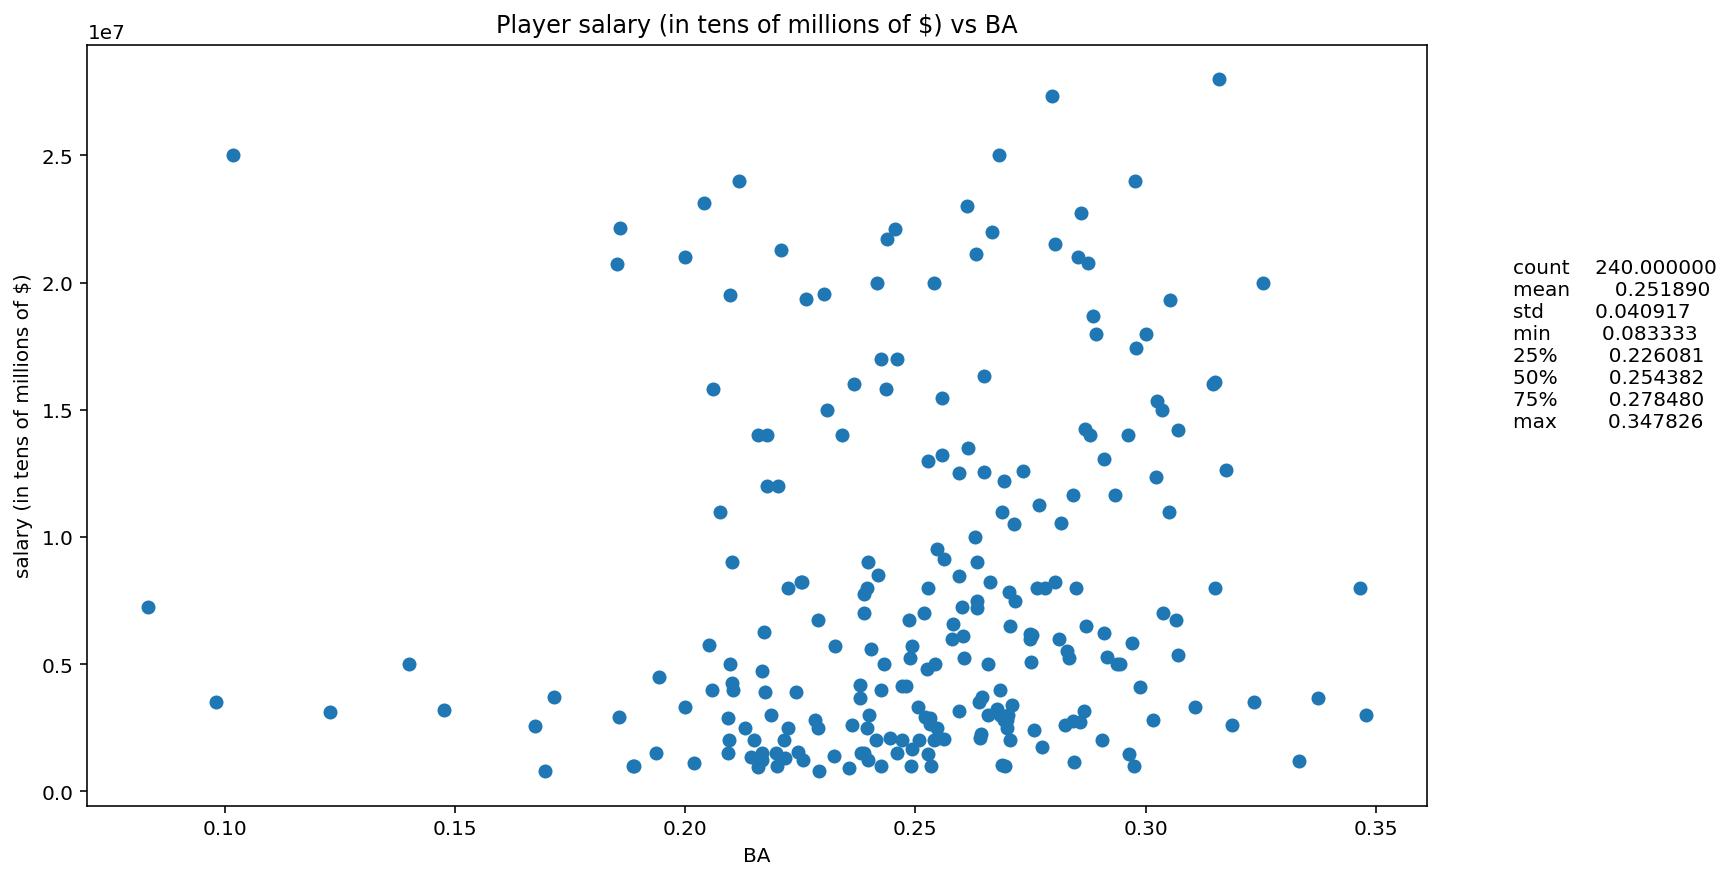

Pearson correlation coefficient of BA and salary: 0.1242815669886531
Spearman correlation coefficient of BA and salary: 0.2172590794095625
Kendall correlation coefficient of BA and salary: 0.1512833672263775


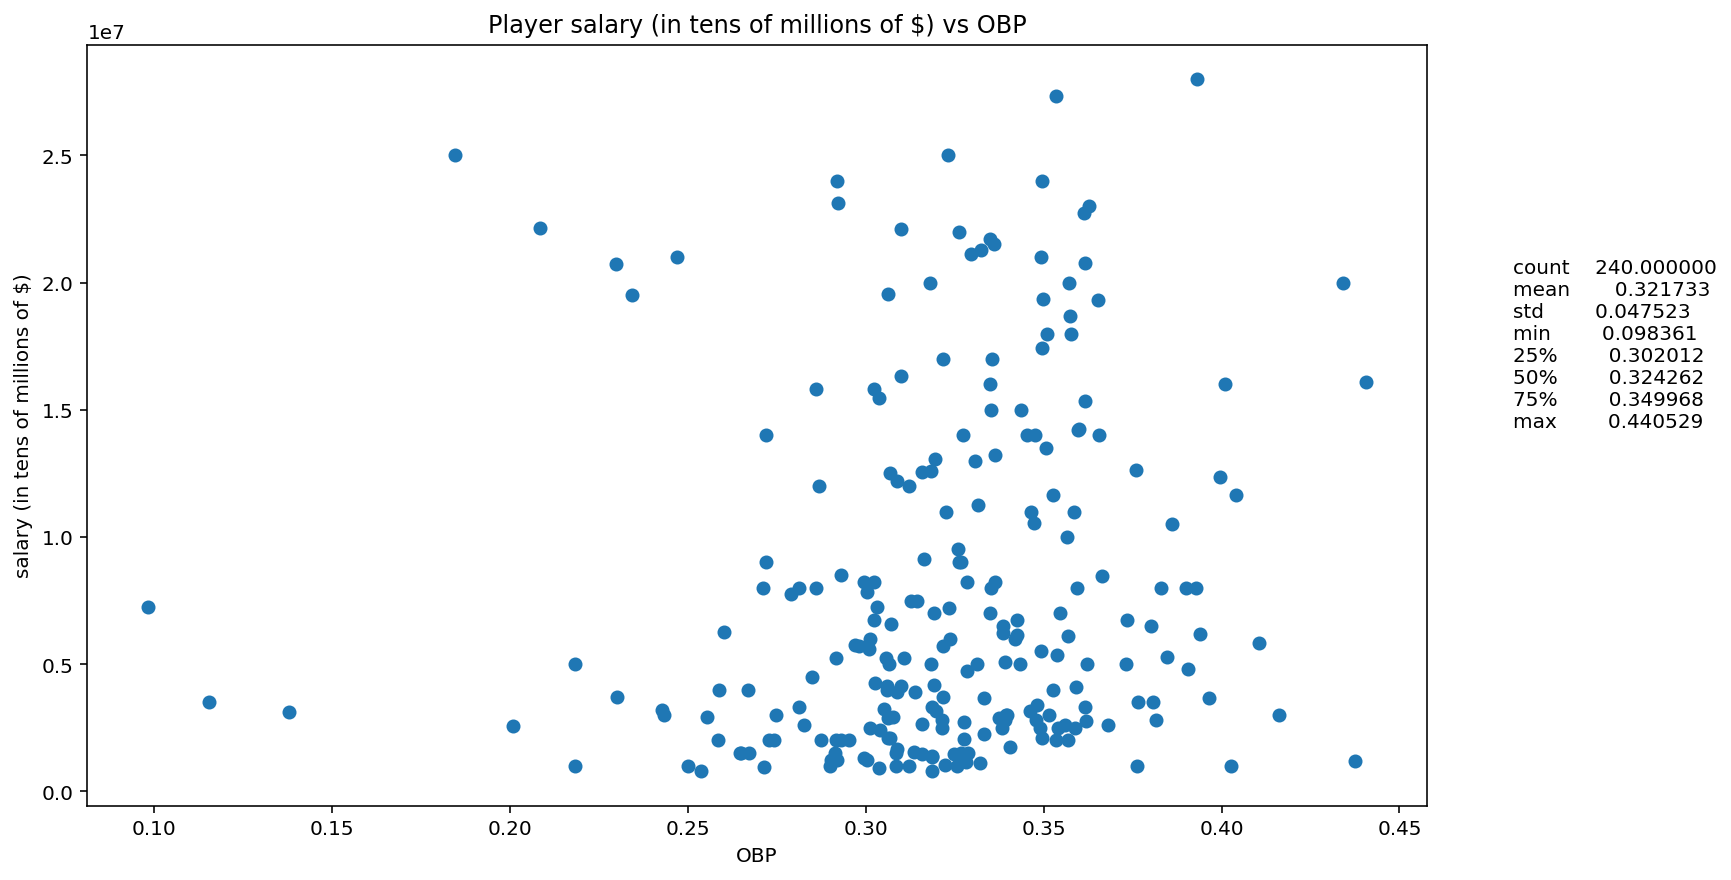

Pearson correlation coefficient of OBP and salary: 0.12649773712289547
Spearman correlation coefficient of OBP and salary: 0.21405396038253924
Kendall correlation coefficient of OBP and salary: 0.145644025171995


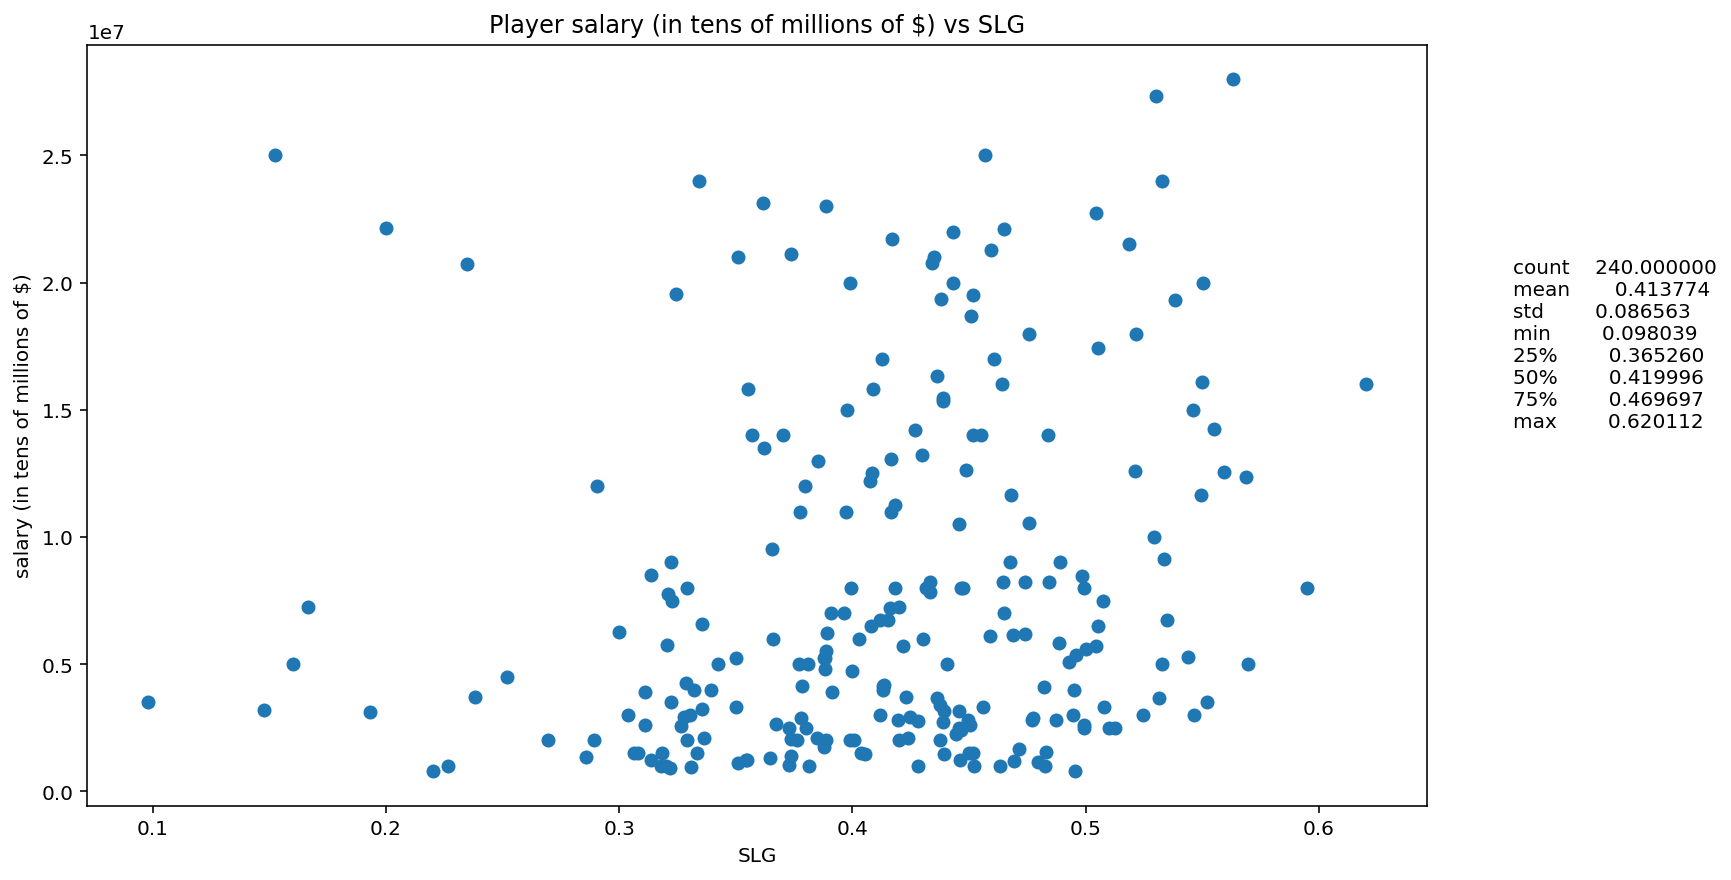

Pearson correlation coefficient of SLG and salary: 0.18681836405622804
Spearman correlation coefficient of SLG and salary: 0.23965575475143397
Kendall correlation coefficient of SLG and salary: 0.1647046885670375


In [11]:
def create_scatterplot(xvar):
    pyplot.scatter(x=filtered_stats[xvar],y=filtered_stats['salary'])

    pearson_corr = filtered_stats[[xvar,'salary']].corr(method='pearson')
    spearman_corr = filtered_stats[[xvar,'salary']].corr(method='spearman')
    kendall_corr = filtered_stats[[xvar,'salary']].corr(method='kendall')

    pyplot.figtext(.95, 0.5, filtered_stats[xvar].describe().to_string())
    pyplot.xlabel(xvar)
    pyplot.ylabel("salary (in tens of millions of $)")
    pyplot.title("Player salary (in tens of millions of $) vs " + str(xvar))
    pyplot.show()

    print("Pearson correlation coefficient of",xvar,"and salary:",pearson_corr.iloc[:,0][1])
    print("Spearman correlation coefficient of",xvar,"and salary:",spearman_corr.iloc[:,0][1])
    print("Kendall correlation coefficient of",xvar,"and salary:",kendall_corr.iloc[:,0][1] )

variable_list = ['weight', 'height', "AB", "R", "H", "2B", "3B", "HR","RBI","SB","BB","PA","BA","OBP","SLG"]

for variable in variable_list:
    create_scatterplot(variable)

After evaluating the relationships between all of our variables and salary, we found four with noticably stronger linear correlations then the others: Runs Batted In, Home Runs, Walks (BB), and Hits. In order to further analyze these variables, we dissected the linear regressions for each and evaluated the strength of a logistic regression to see if that may be a stronger representation of the data.

In [12]:
def simple_regression(n):
    model = LinearRegression().fit(filtered_stats[[n]], filtered_stats[['salary']])
    print("Linear regression slope for salary vs. " + n + ":", model.coef_[0][0])
    print("Linear regression intercept for salary vs. " + n + ":", model.intercept_[0])
    print("Linear regression score for salary vs. " + n + ":", model.score(filtered_stats[[n]], filtered_stats[['salary']]))

selected_stats = ['RBI', 'HR', 'BB', 'H']

for stat in selected_stats:
    simple_regression(stat)
    print()

Linear regression slope for salary vs. RBI: 79867.17527891042
Linear regression intercept for salary vs. RBI: 3828717.8374136067
Linear regression score for salary vs. RBI: 0.134928241022247

Linear regression slope for salary vs. HR: 197161.996905589
Linear regression intercept for salary vs. HR: 5076505.185671769
Linear regression score for salary vs. HR: 0.10729235795784921

Linear regression slope for salary vs. BB: 85234.81437586324
Linear regression intercept for salary vs. BB: 4675839.207860775
Linear regression score for salary vs. BB: 0.09325807181382373

Linear regression slope for salary vs. H: 37128.22668418655
Linear regression intercept for salary vs. H: 4168418.620581783
Linear regression score for salary vs. H: 0.08659588352723402



In [13]:
multiple_model_all = LinearRegression().fit(filtered_stats[['RBI', 'HR', 'BB', 'H']], filtered_stats[['salary']])
print("Multiple regression all variables slopes:", multiple_model_all.coef_[0])
print("Multiple regression all variables intercept:", multiple_model_all.intercept_[0])
print("Multiple regression all variables score:", multiple_model_all.score(filtered_stats[['RBI', 'HR', 'BB', 'H']], filtered_stats[['salary']]))

Multiple regression all variables slopes: [118891.71151326 -53693.52230346  23622.05989112 -23422.65420427]
Multiple regression all variables intercept: 4066191.0938644363
Multiple regression all variables score: 0.14285335125400866


In [14]:
def log_reg(n):
    logregRBI = LogisticRegression(max_iter=1000)
    logregRBI.fit(filtered_stats[['salary']],filtered_stats[n])
    print("Logistic Regression score for " + n + " & Salary", logregRBI.score(filtered_stats[['salary']],filtered_stats[n]))

for stat in selected_stats:
    log_reg(stat)
    print()

Logistic Regression score for RBI & Salary 0.020833333333333332

Logistic Regression score for HR & Salary 0.0625

Logistic Regression score for BB & Salary 0.020833333333333332

Logistic Regression score for H & Salary 0.0125



After all this, for physical attributes such as height and weight we ran k-means clustering against them with respect to salary because we believed from the scatter plots that there are 3 clusters of MLB hitters (optimal, less opimal and least optimal) based on physical genetic factors of height and weight. 

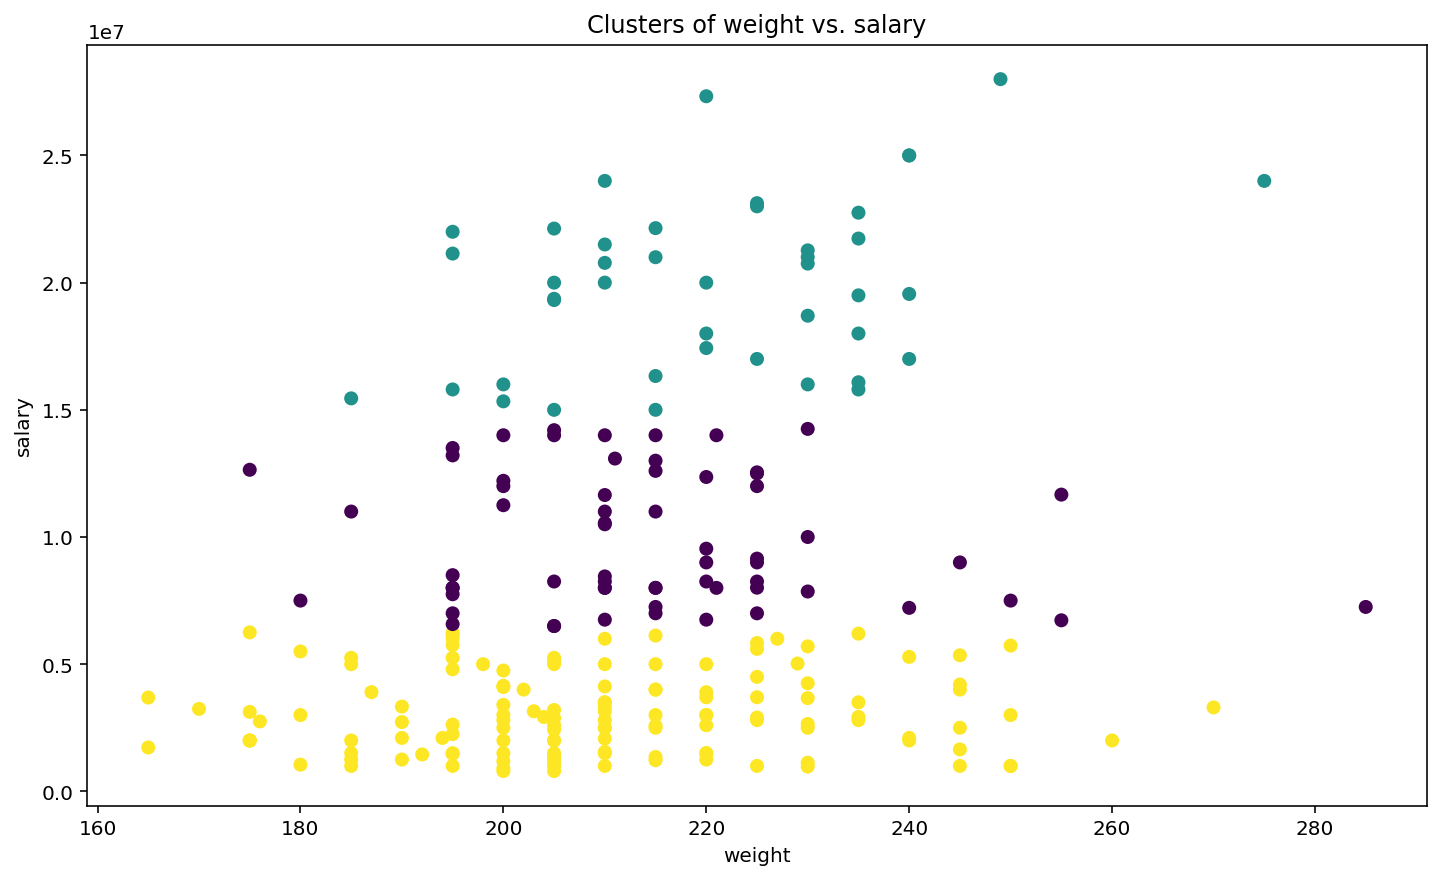

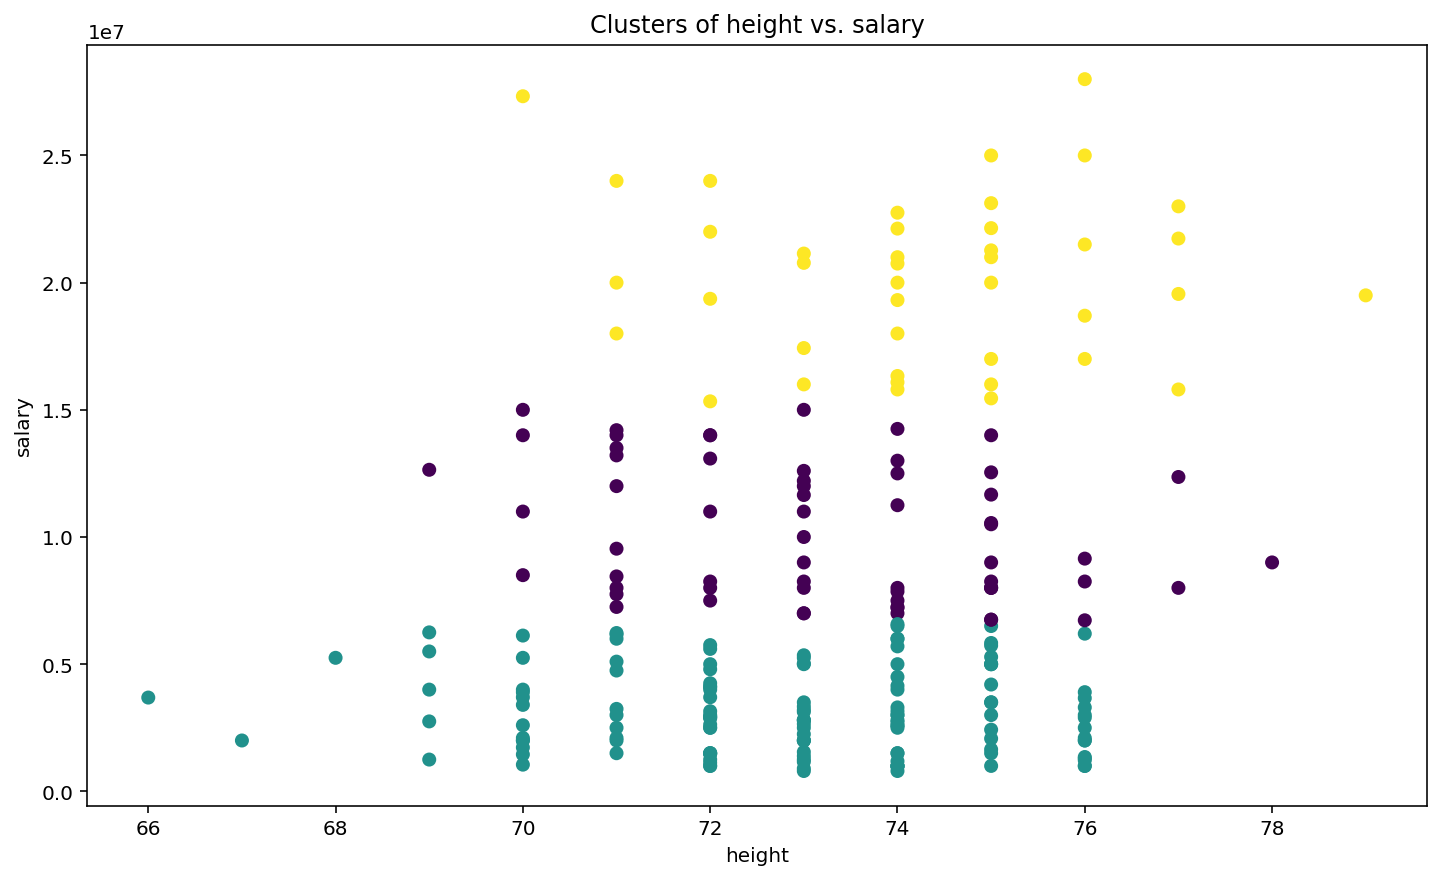

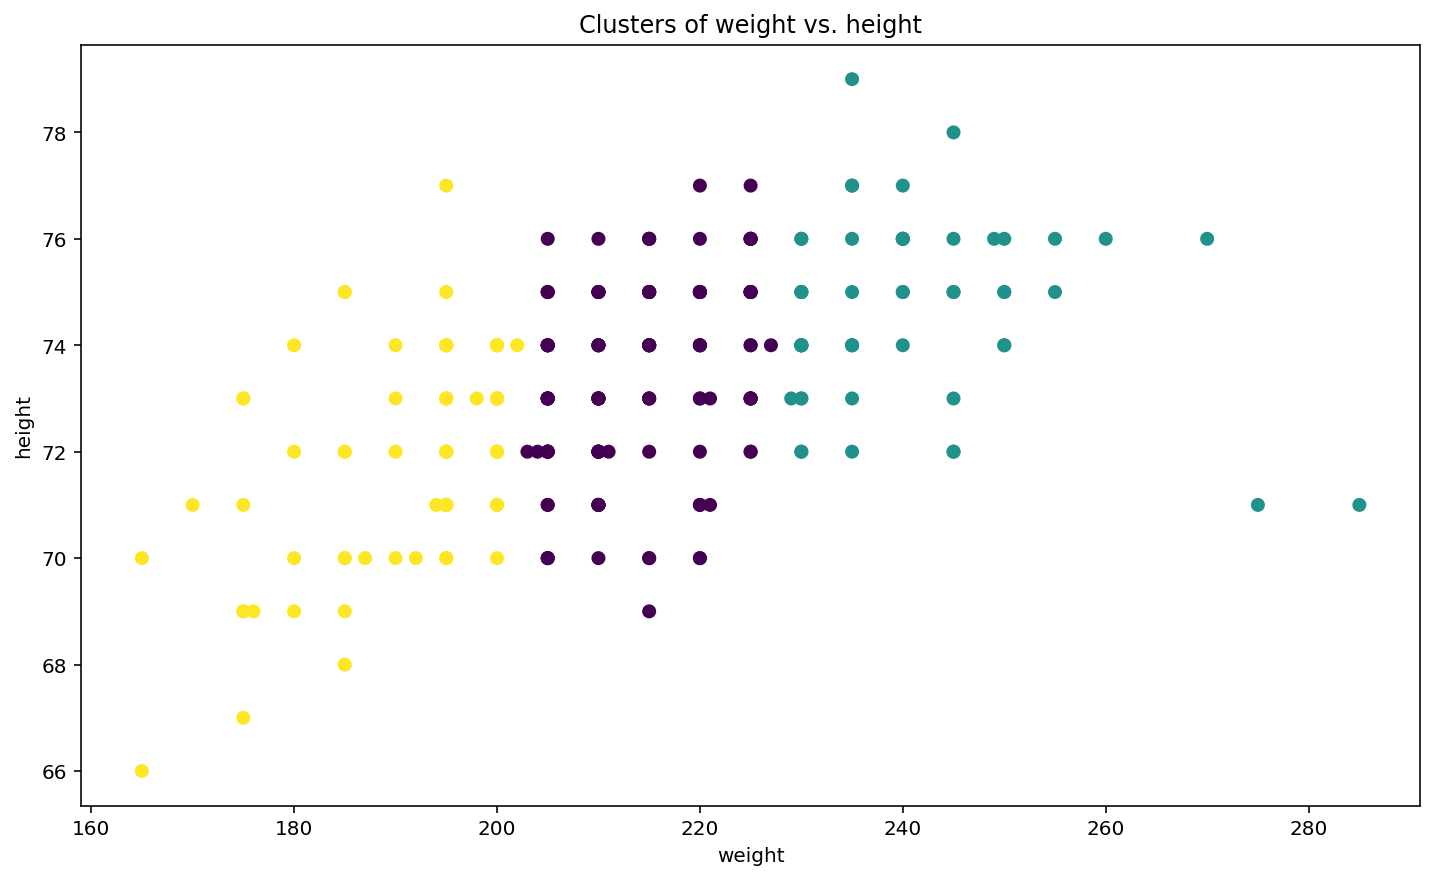

In [15]:
from sklearn.cluster import KMeans

def clustering_plot(xvar, yvar):
    values = filtered_stats[[xvar, yvar]]
    clustering= KMeans(n_clusters=3)
    clustering.fit(values)
    labels = clustering.labels_

    pyplot.scatter(filtered_stats[xvar],filtered_stats[yvar],c=labels,cmap='viridis')
    pyplot.xlabel(xvar)
    pyplot.ylabel(yvar)
    pyplot.title("Clusters of " + str(xvar) + " vs. " + str(yvar))
    pyplot.show()

clustering_plot('weight', 'salary')
clustering_plot('height', 'salary')
clustering_plot('weight', 'height')

**Evaluation of Significance**

We created this function to create a random permutation of the salary values in order to set up our evaluation of significance.

In [16]:
def permuted_salary():
    return numpy.random.permutation(filtered_stats['salary'].copy())

This function creates an array of 1000 values and fills them with linear regression scores of the inputted variable vs. randomly permuted salary values. Then, it plots a histogram of these scores, and counts the ones greater than the actual regression score of the variable vs. the real salary values. The goal of this is to evaluate our regression score against the scores when the values are randomized, to see if our correlation is better than true randomness.

In [17]:
def scores_plot(n):
    scores = numpy.zeros(1000)
    for i in range(1000):
        salaries = permuted_salary()
        model = LinearRegression().fit(filtered_stats[[n]], salaries)
        scores[i] = model.score(filtered_stats[[n]], salaries)

    pyplot.hist(scores, bins=30)
    pyplot.xlabel('score')
    pyplot.ylabel('count')
    pyplot.title('Random Linear Regression Scores For ' + n)
    pyplot.show()

    real_model = LinearRegression().fit(filtered_stats[[n]], filtered_stats[['salary']])
    real_score = real_model.score(filtered_stats[[n]], filtered_stats[['salary']])
    count = 0
    for i in range(len(scores)):
        score = model.score
        if scores[i] > real_score:
            count += 1
    print("Count of scores greater than real regression score for " + n + ":", count)

The goal of this function is to create scatterplots with a regression line for the real values, and then create several scatterplots of the input variables vs. randomly permuted salaries in order to obtain a visual comparison of the real regression line against randomness. If any of these random regression lines have slopes greater than that of the real one, and are thus more correlated, the lines will become red, like the real one itself.

In [18]:
def permuted_scatters(n):
    print("Permuted scatterplots for " + n + ":")
    palette = pyplot.get_cmap("Set1")
    pyplot.figure(figsize=(16,8))
    for panel in range(1,22):
        pyplot.subplot(3,7,panel)
        model = LinearRegression().fit(filtered_stats[[n]], filtered_stats[['salary']])
        if panel == 1:
            pyplot.scatter(filtered_stats[n], filtered_stats['salary'])
            pyplot.plot(filtered_stats[n], model.predict(filtered_stats[[n]]), color=palette(0))
        else:
            salaries = permuted_salary()
            permuted = LinearRegression().fit(filtered_stats[[n]], salaries)
            permuted_slope = permuted.coef_[0]
            permuted_predicted = permuted.predict(filtered_stats[[n]])
            pyplot.scatter(filtered_stats[n], salaries)
            color = palette(1)
            if permuted_slope > model.coef_[0]:
                color = palette(0)
            pyplot.plot(filtered_stats[n], permuted_predicted, color)

    pyplot.show()

Here, we iterate through the list of selected stats and run the two previous functions for each of them. As shown below, our regression models reveal much higher scores and better correlation than random results. This increases confidence in our regressions.

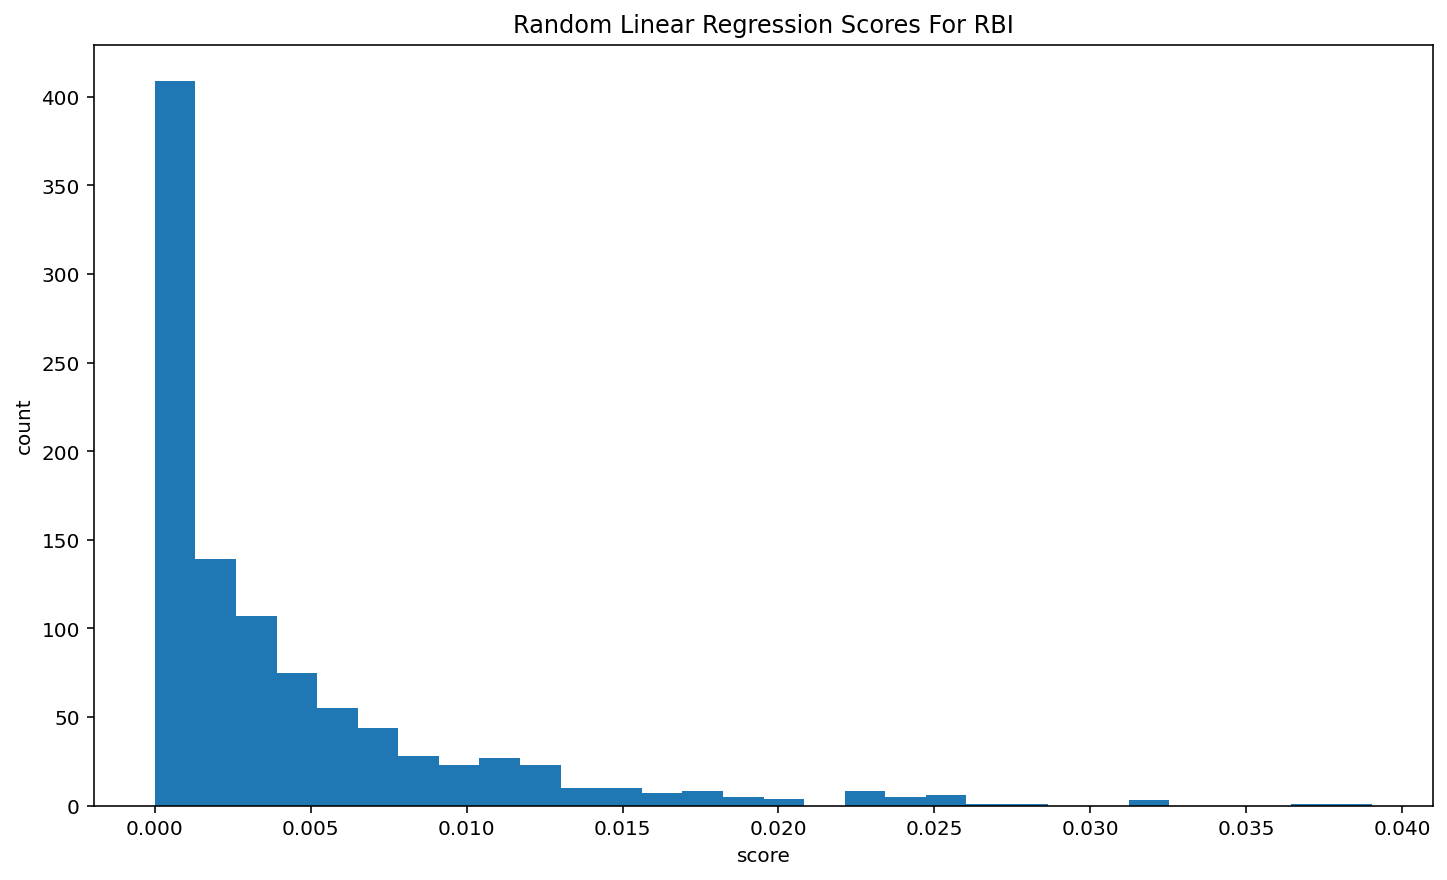

Count of scores greater than real regression score for RBI: 0


Permuted scatterplots for RBI:


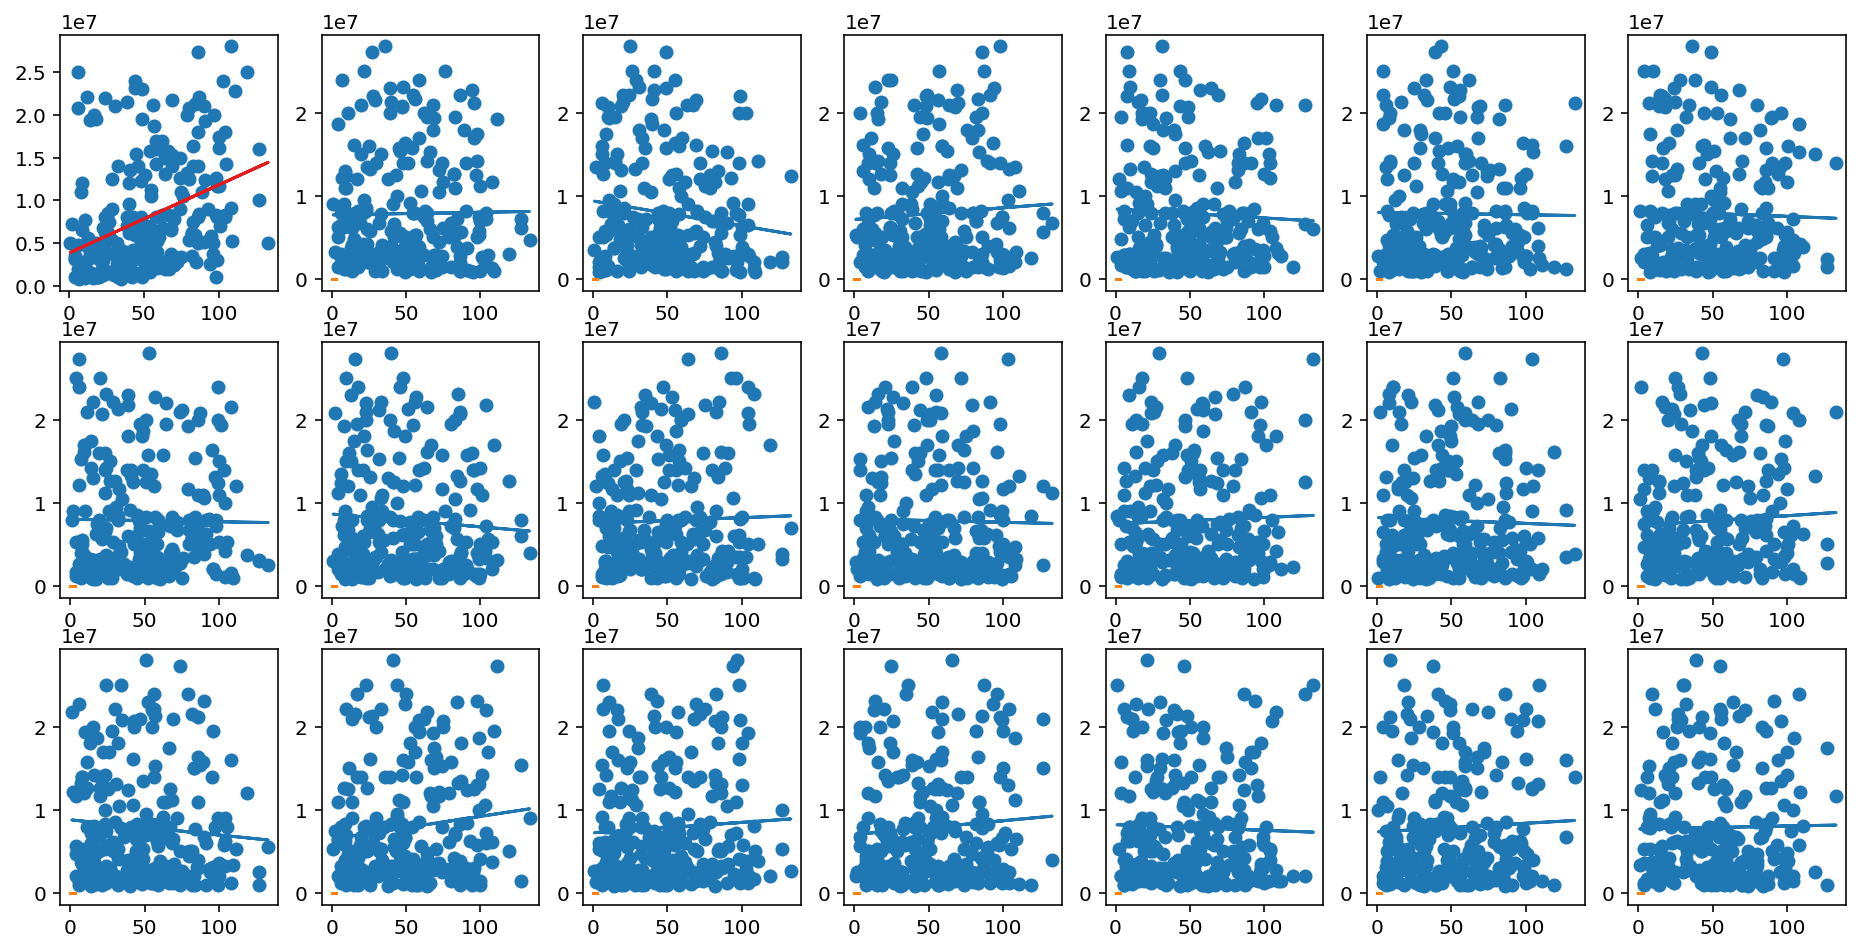

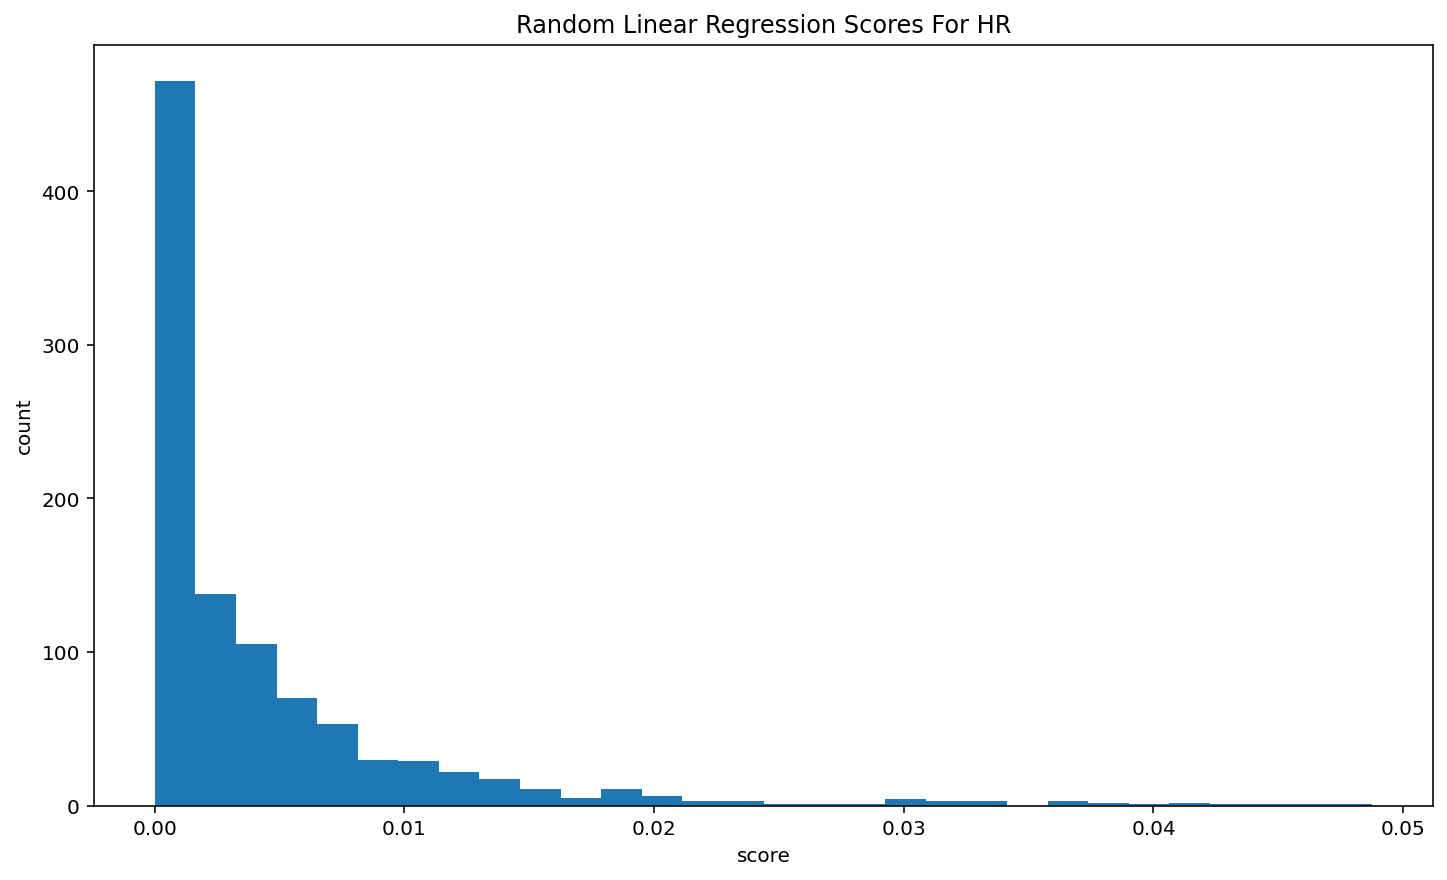

Count of scores greater than real regression score for HR: 0


Permuted scatterplots for HR:


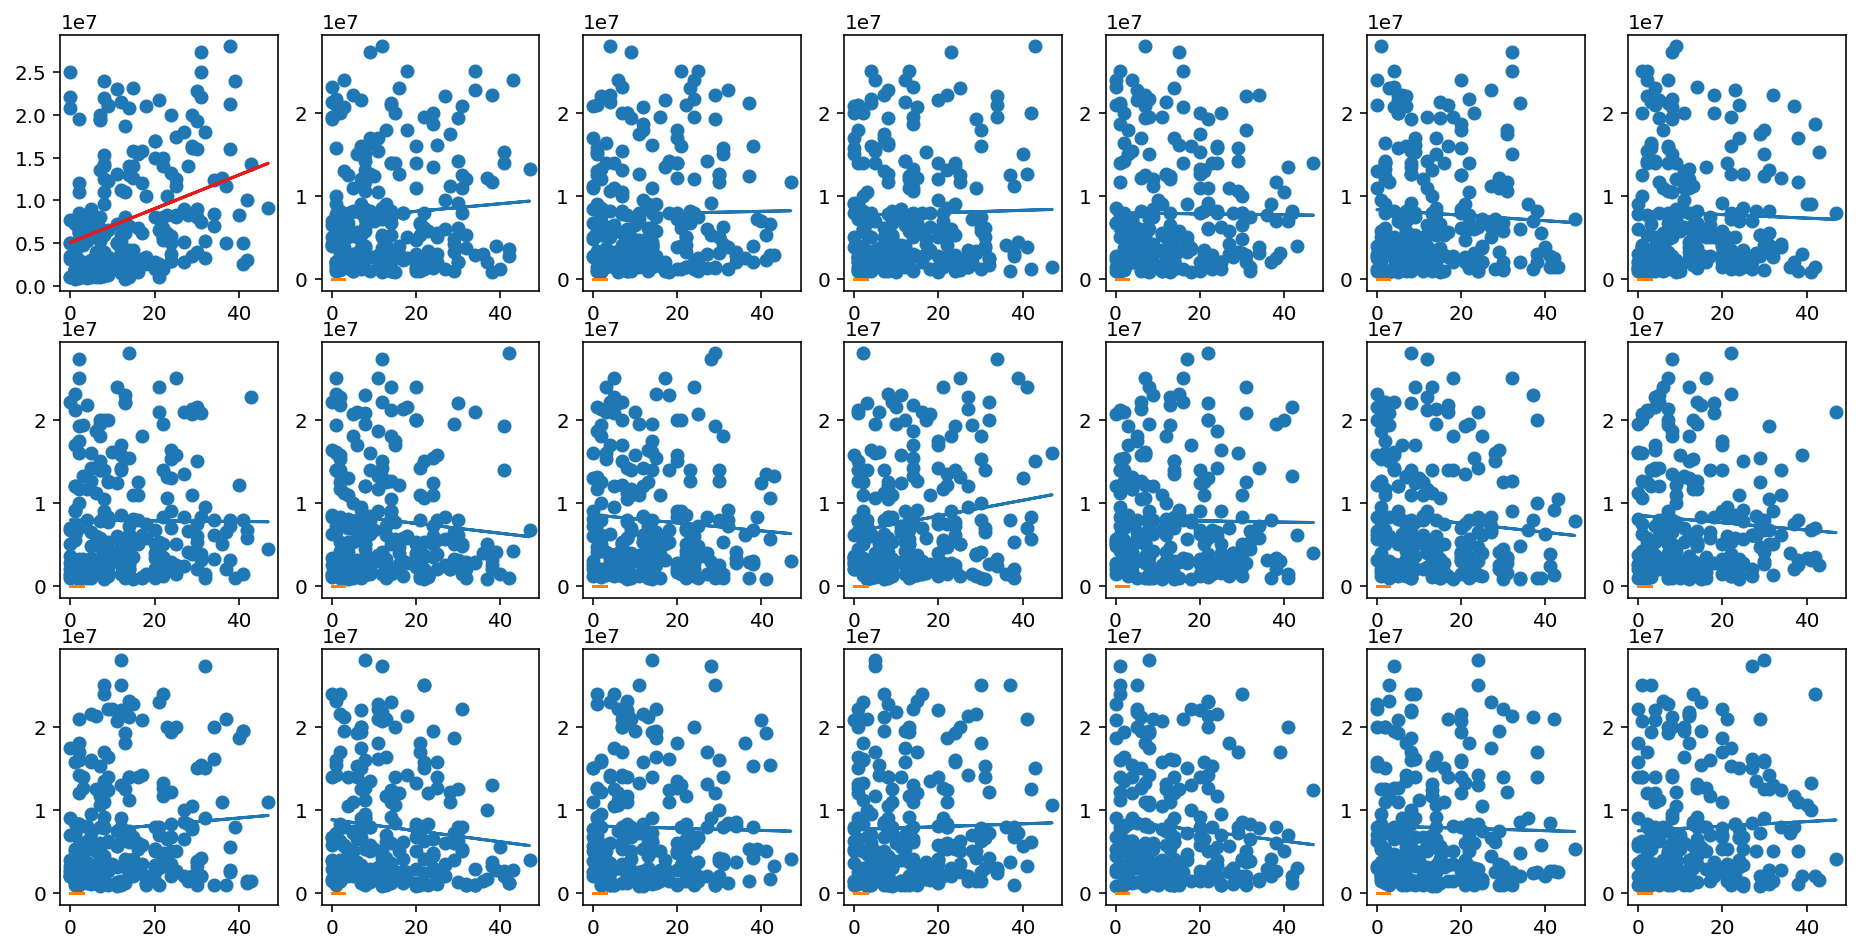

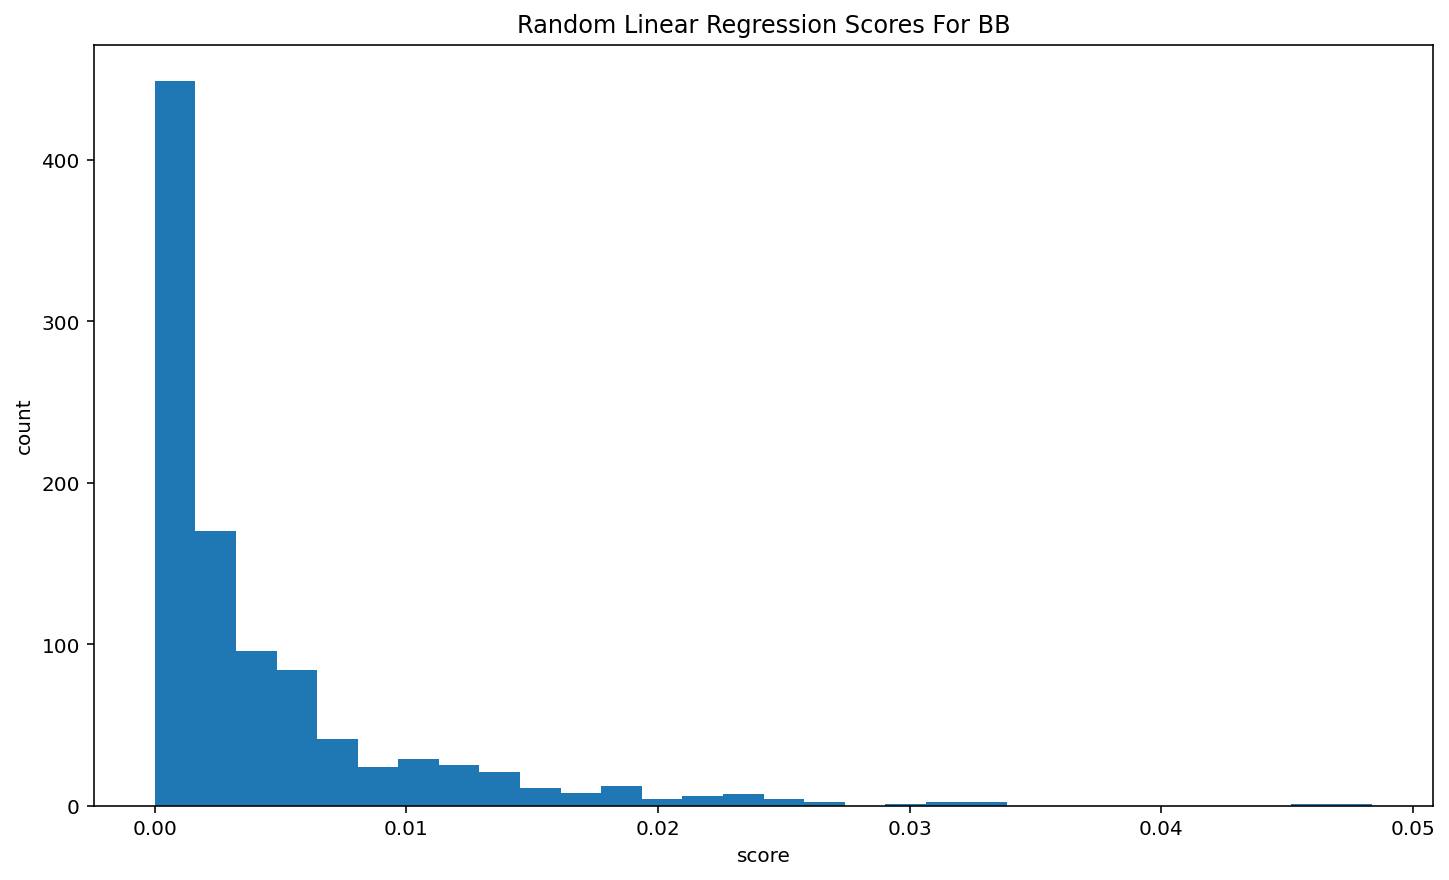

Count of scores greater than real regression score for BB: 0


Permuted scatterplots for BB:


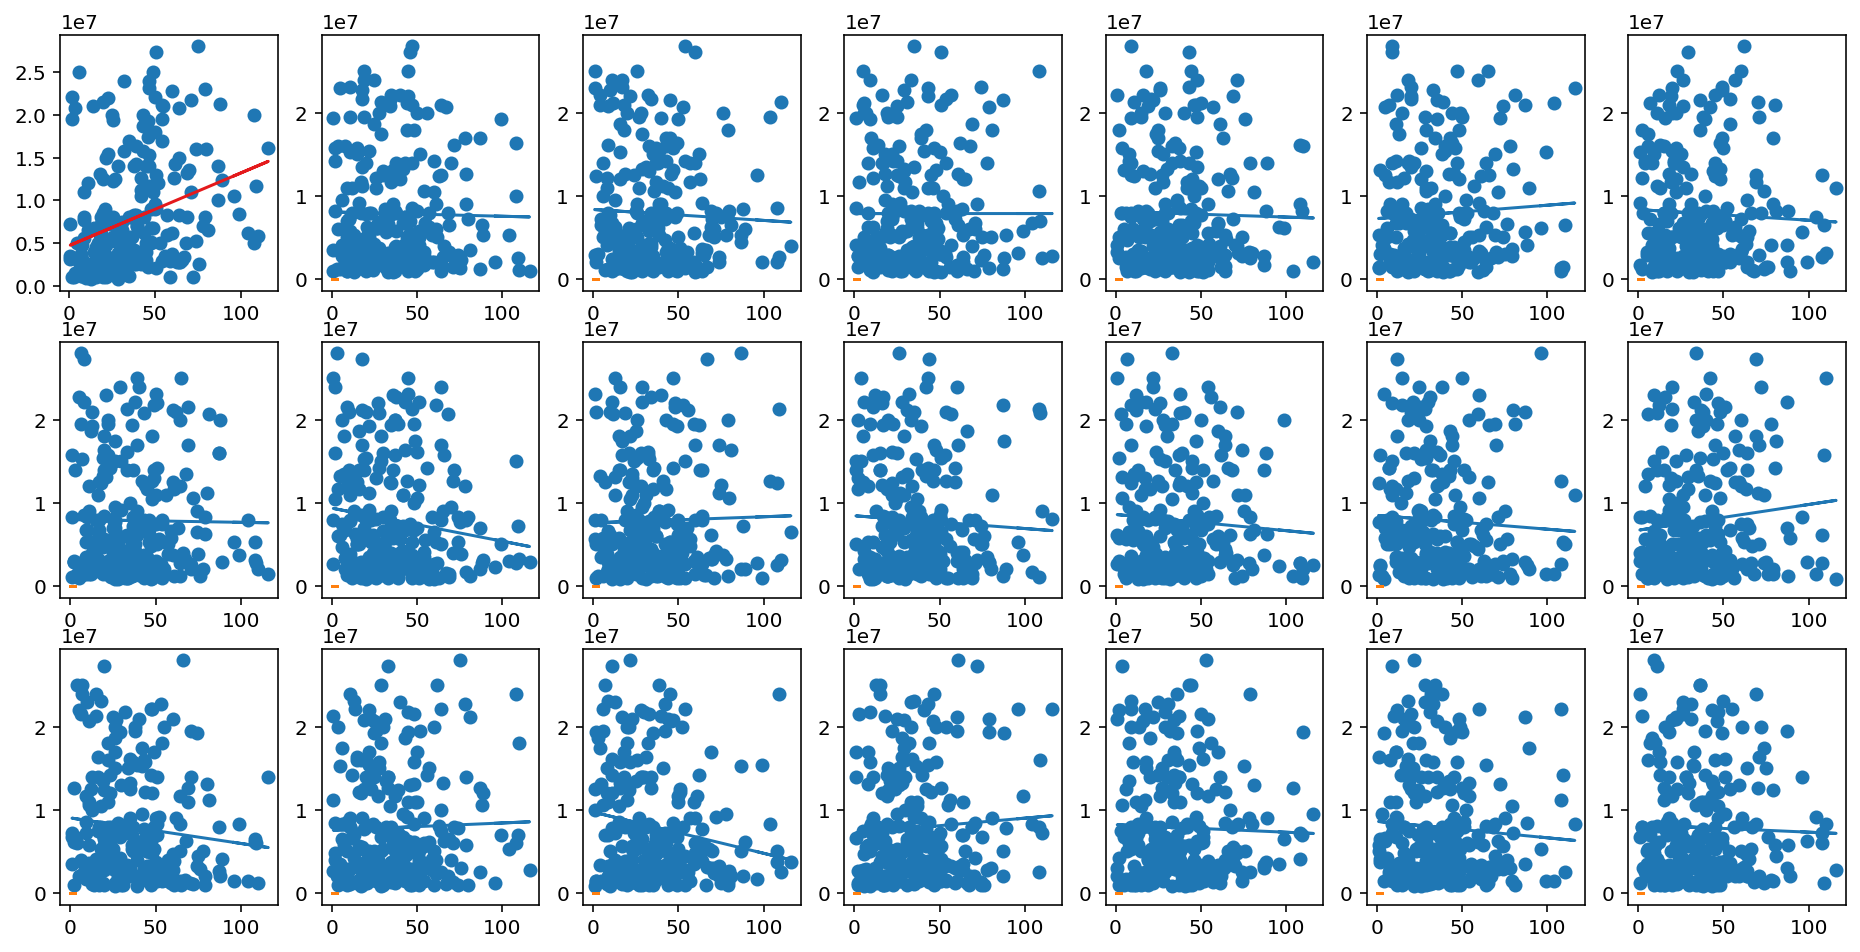

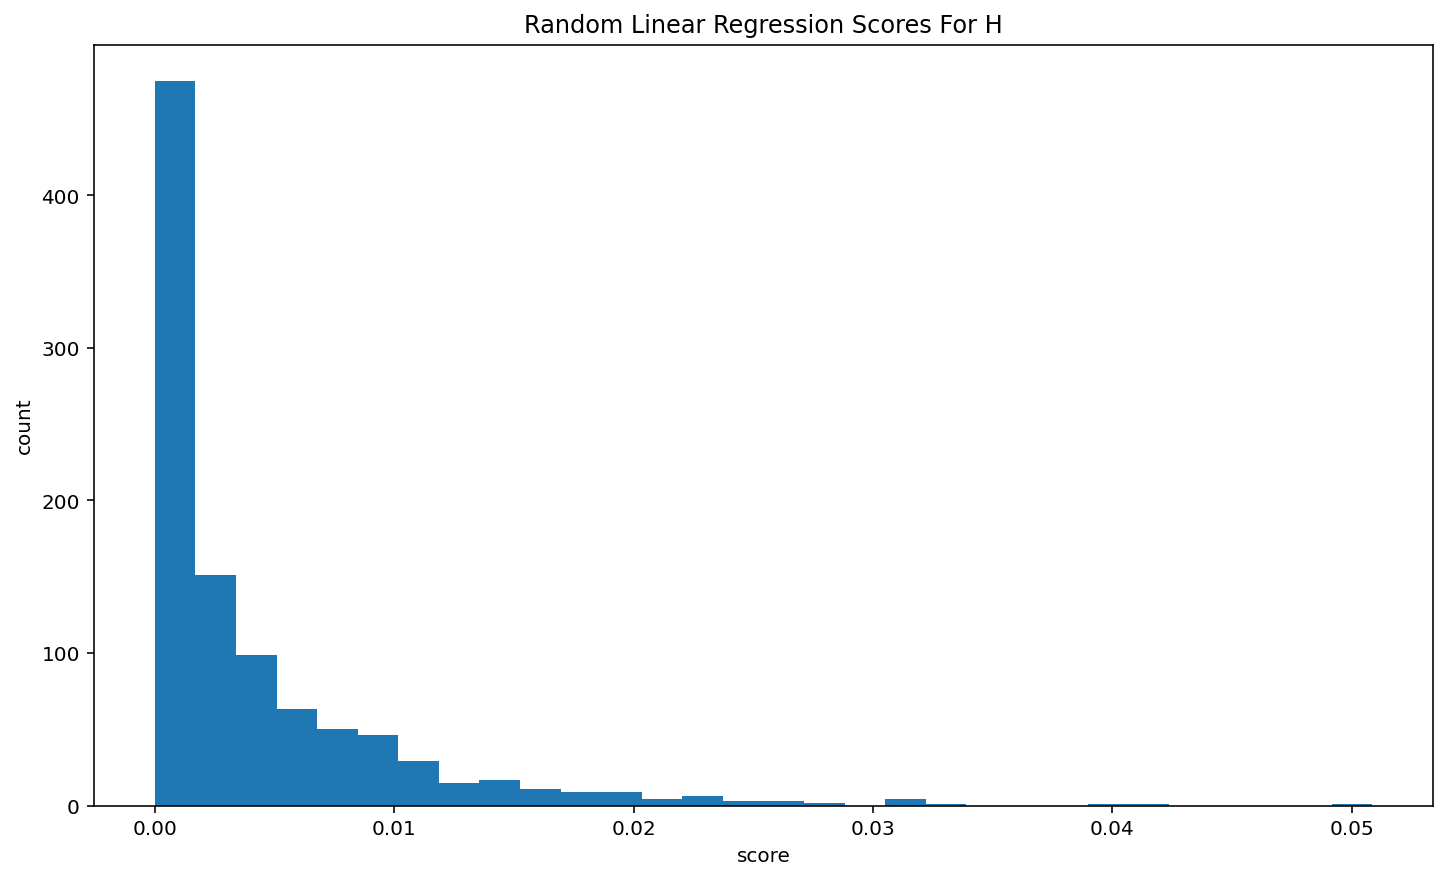

Count of scores greater than real regression score for H: 0


Permuted scatterplots for H:


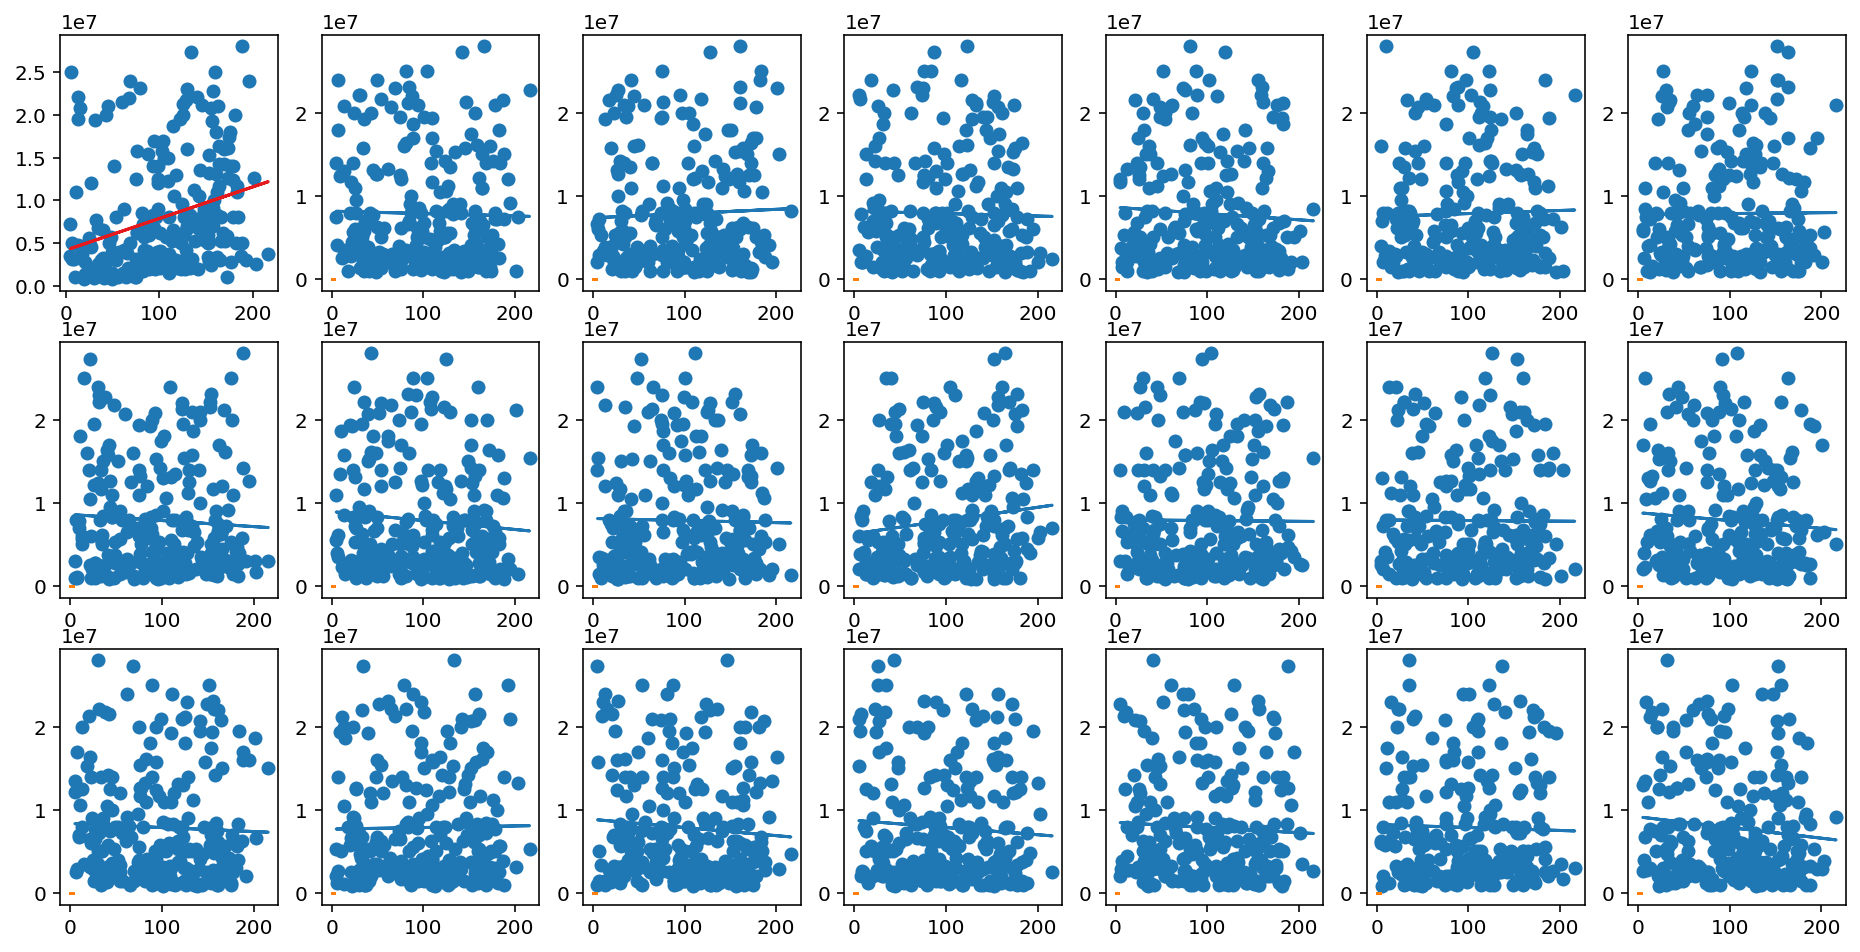

In [19]:
for stat in selected_stats:
    scores_plot(stat)
    print("\n")
    permuted_scatters(stat)

Next, we ran similar code as the scores_plot function, but with a multiple regression using all four variables in this list of selected stats.

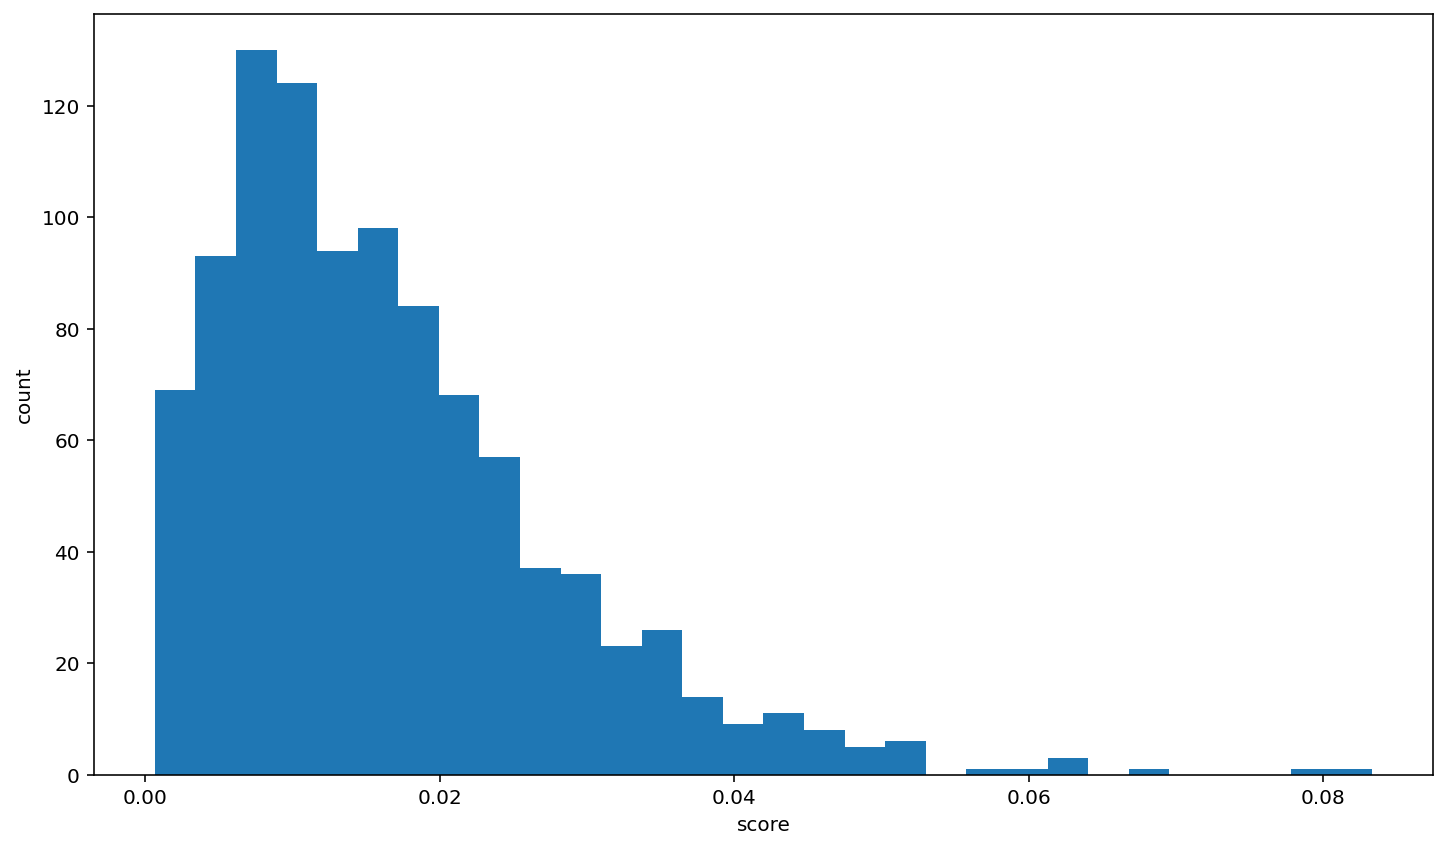

Count of scores greater than real multiple regression score for all variables: 0


In [20]:
scores = numpy.zeros(1000)
for i in range(1000):
    salaries = permuted_salary()
    model = LinearRegression().fit(filtered_stats[['RBI', 'HR', 'BB', 'H']], salaries)
    scores[i] = model.score(filtered_stats[['RBI', 'HR', 'BB', 'H']], salaries)

pyplot.hist(scores, bins=30)
pyplot.xlabel('score')
pyplot.ylabel('count')
pyplot.show()

count = 0
for i in range(len(scores)):
    if scores[i] > 0.14285335125400866:
        count += 1
print("Count of scores greater than real multiple regression score for all variables:", count)

After analyizing the confidence in our correlations, we came to discover that not a single one was the result of random chance. Each score calculated from the real regressions would be a far outlier in a set with randomly permuted combinations. Thus, we know we can have strong confidence that these correlations are existant and, again, not created by random chance.

**Conclusion**

Over the course of our data analysis, we had many interesting observations and were able to draw some relatively strong conclusions. First, we analyzed the salary distribution in our dataset using a histogram. This showed how the salaries varies in terms of frequency: salaries earned by MLB hitters are mainly clustered between 1 and 7.5 million dollars, following a exponential decay based plot skewed to the right. This set us up to begin our analysis.

After graphing the scatterplots to see which attributes affect the salary the most, we measured the 3 correlation coefficients we have learned about in class (Spearman, Pearson, and Kendall) to find the strongest correlations. From these results, we noticed that home runs, RBI (runs batted in), base on balls (walks) and hits seemed to have the most impact on a MLB batter's salary, as the coefficient values were highest and there appeared to be some sort of dependency shown through the scatterplots. RBI specifically had the highest correlation, indicating the strongest relationship with salary preliminarily. This hypothesis was also supported by the linear regression modeling where RBI had the highest linear regression score against salary, showing that a non-insiginificant portion of the relationship can be accounted for by a linear model. This result aligned with our expections given our knowledge of baseball and spending, as the more runs you are contributing to your team over the course of a season increases the chances of your team winning, meaning the player is contributing to more wins and, thus, worth more money. It should be noted, however, that the linear regression for all the models are not particularly strong, as the correlations remained below .4 for each variable, indicating that there is uncertainty in reaching such a conclusion of linear dependence.

In addition to testing out linear regression models, we also tried out logistic regression models for these four best attributes to see of this type of function would be a better fit for the data. Although three variables showed a weaker correlation with a logistic model, the surprising result was that HR (home runs) seemed to fit the salary in terms of a logistic function better than the others, slightly indicating that as home runs reach their maximum values, then salary tapers off. However, the score of the regression model is still very low so there is uncertainty in reaching such a conclusion. The reason this might have happened is because not enough data might be there for high salary and high home run hitters, as hitters do not hit more than 60 or (in extraordinary historical circumstances) 70 home runs in a season, thus limiting the correlations at higher values.

For physical attributes such as height and weight, we made use of K-means clustering to run models against them with respect to one another, as well as salary. In this analyis, we found there to be 3 main clusters of MLB hitters. There appears to be an optimal cluster of player weights and heights that results in higher salaries, with the other 2 clusters appearing to show relatively lower salaries. While it may be rather surprising that there is no linear relationship (such as the taller the player the higher the salary), it makes sense that an optimal cluster exists at a middle ground in the data. We concluded that the optimal weight of a hitter is roughly 220 pounds and the optimal height is 74 inches (6 feet, 2 inches). The weight seems logical as 220 pounds for a player of this size is enough weight to have a decent amount of muscle mass while not costing the player much speed on the basepaths and in the field. Meanwhile, the height is logical as taller players have a longer reach with their bat and they can create enough torque to provide ample drive into the ball. That said, being too tall can be a detractor as it creates a larger strikezone to stike out in and may make for a slower, lankier, and/or less durable player.

The count of scores greater than real regression scores for the four variables show that the correlation to linear regression models are not created by random chance. This is shown first in our multiple permuted plots of salary, where all lines aside from the real data are blue, indicating that none of the scores have comparable strength to our model (in which case they'd appear as red), which makes us confident of our  models. Additionally, our histograms showing the range of these permuted model scores show that our calculated scores would be far outliers in these sets, demonstrating the extremely low probability that our results were caused by random chance. As a result, we are quite confident in our linear models.

After our complete analysis, we can confidently conclude that the variables we selected to analyze do have an impact on salary, and increasing one's hitting power, contact skills, and "batting eye" (ability to distinguish between balls and strikes and swing accordingly) in order to increase RBI, home runs, hits, and walks would likely lead to a higher salary. However, a plethora of other factors go into baseball salaries, including other statistics we did not analyze, factors beyond the player's control such as weight and, especially, height, as well as the skillset of teammates and a team's finances. There is no surefire way to increase one's salary, but focusing on the factors mentioned is a good start; their correlation with salary is surely not random.

**Source Code**

Not applicable; all of our code is contained within this notebook file.

**Acknowledgements**

We would like to acknowledge the following orgnizations for both the use of their Python modules as well as the supporting reference documentation they've made available on these websites:
- https://numpy.org/
- https://pandas.pydata.org/
- https://matplotlib.org/
- https://scikit-learn.org/

We would also like to acknowledge the following websites for providing us with the data we needed to create this project:
- https://data.world/makeovermonday/2019w19/workspace/file?filename=MLB+Stats.csv
- https://www.baseball-reference.com/leagues/MLB/2016-standard-pitching.shtml

Last, but not least, we would like to acknowledge Professor Mimno and the TA staff of INFO2950 for teaching us how to do essentially everything in this project and what it means. Lectures, homeworks, sections, and Campuswire have been invaluable assets to both our learning and our creation of this project.